<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/ML_for_Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

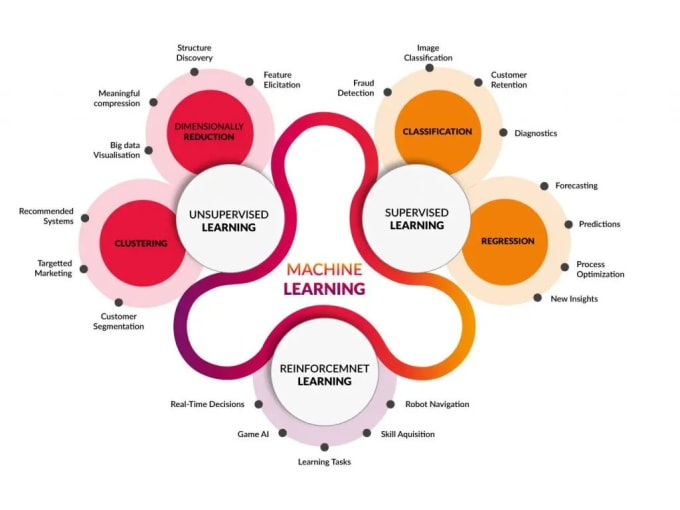

In [1]:
pip install style

In [2]:
import style
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [4]:
data = pd.read_csv('rainfall in india 1901-2015.csv')
data = data.fillna(data.mean())
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

YEAR          JAN  ...      Jun-Sep      Oct-Dec
count  4116.000000  4116.000000  ...  4116.000000  4116.000000
mean   1958.218659    18.957320  ...  1064.724769   154.100487
std      33.140898    33.569044  ...   706.881054   166.678751
min    1901.000000     0.000000  ...    57.400000     0.000000
25%    1930.000000     0.600000  ...   574.375000    34.200000
50%    1958.000000     6.000000  ...   882.250000    98.800000
75%    1987.000000    22.125000  ...  1287.550000   212.600000
max    2015.000000   583.700000  ...  4536.900000  1252.500000

[8 rows x 18 columns]

Month wise graph analysis

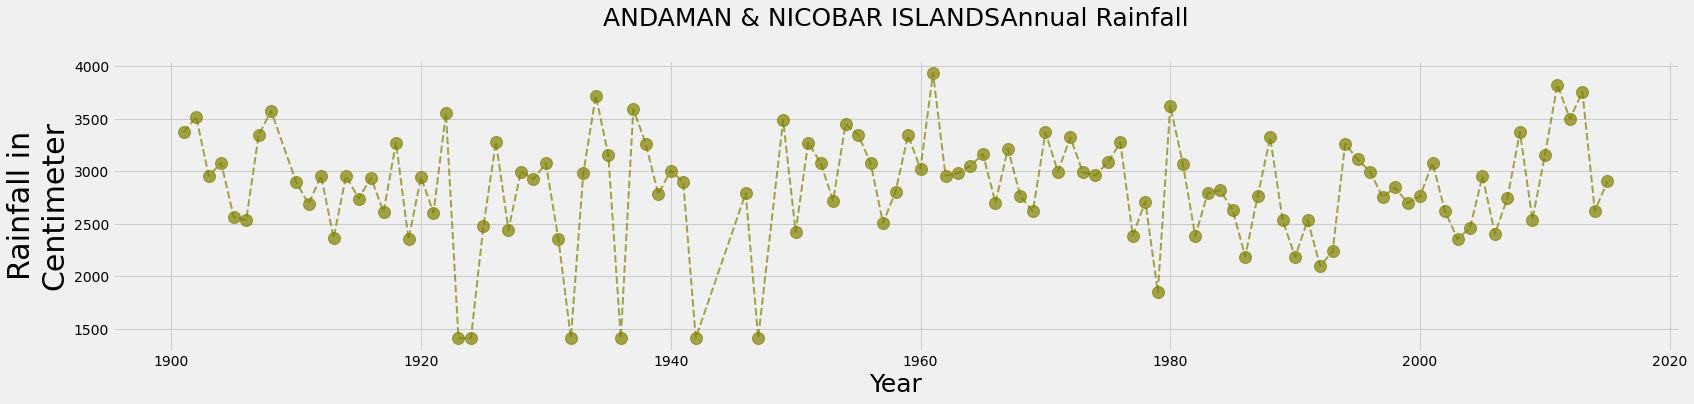

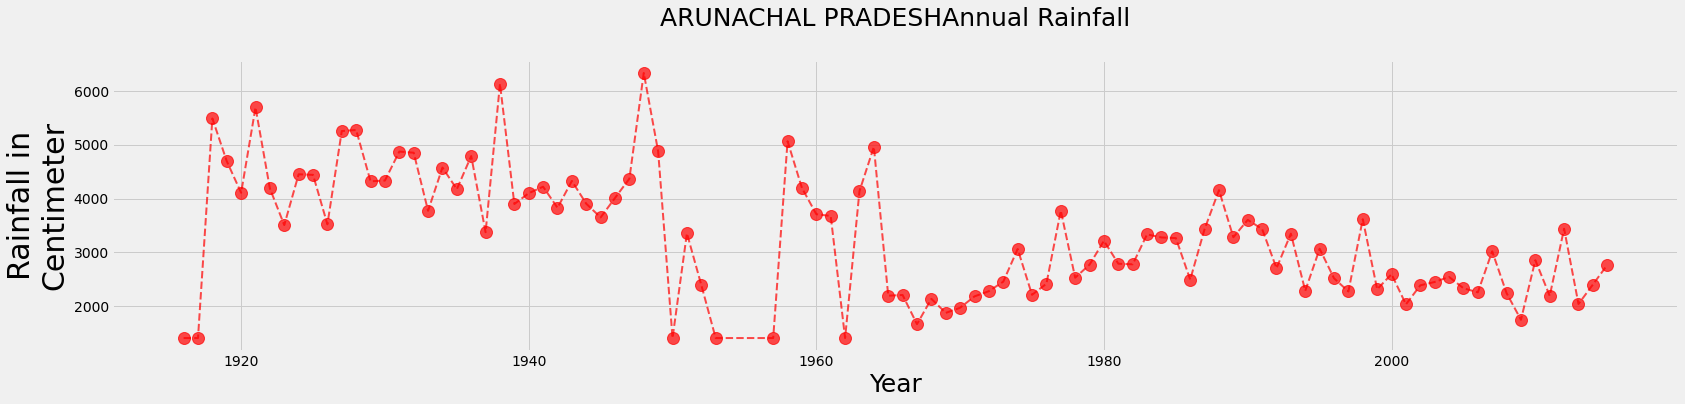

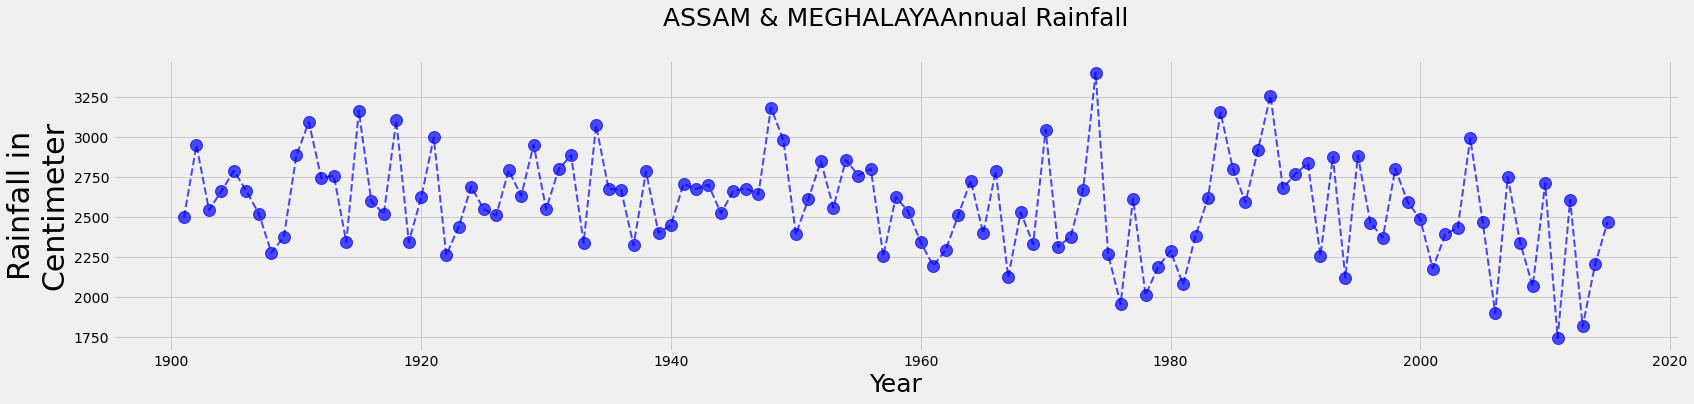

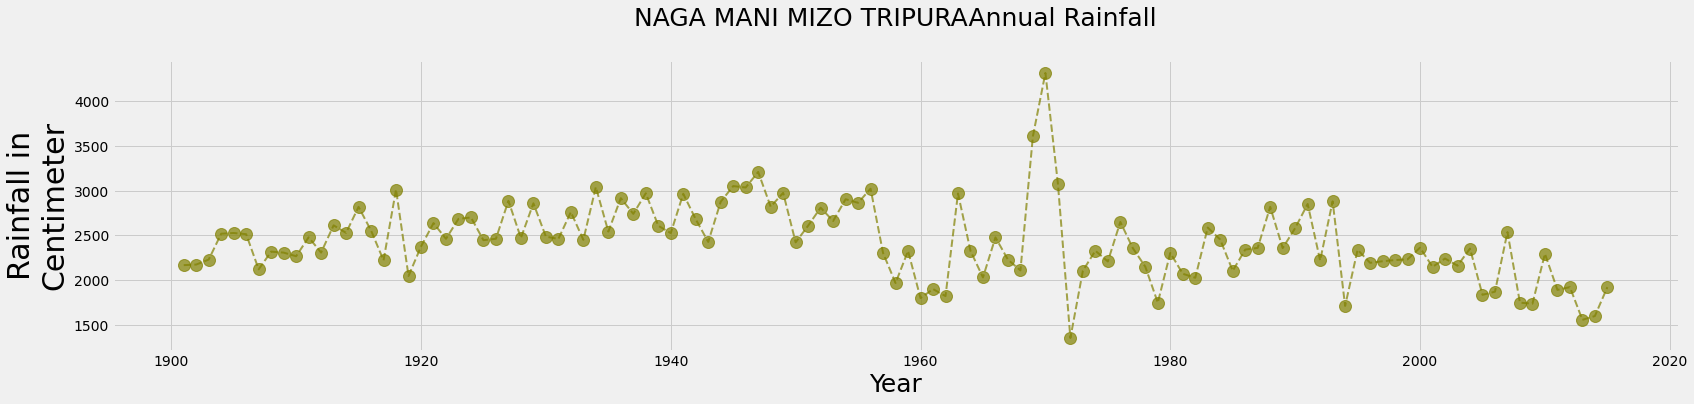

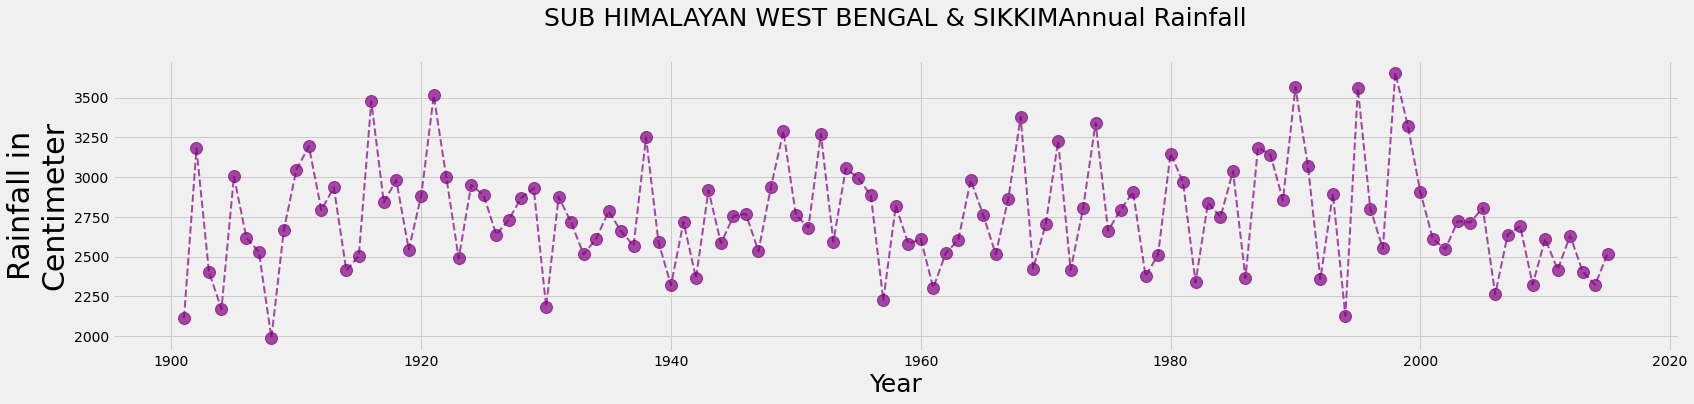

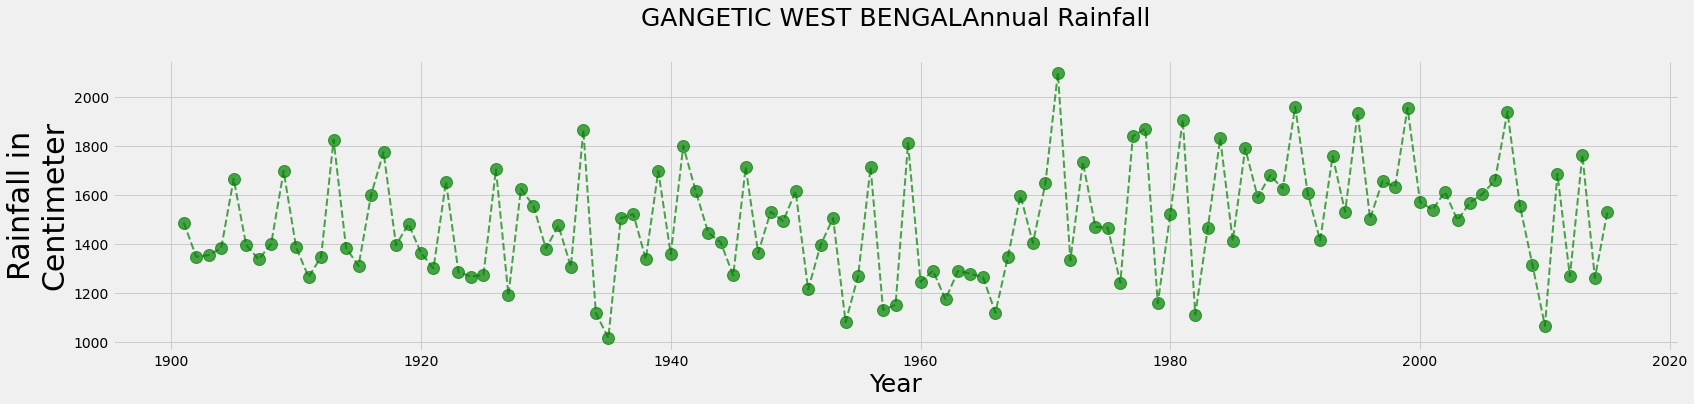

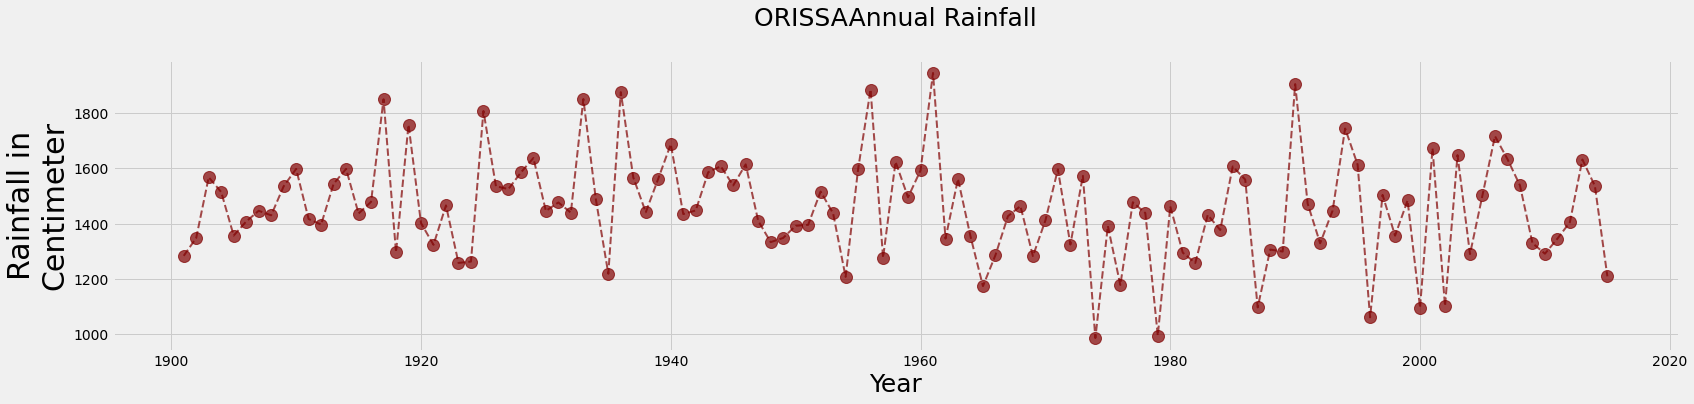

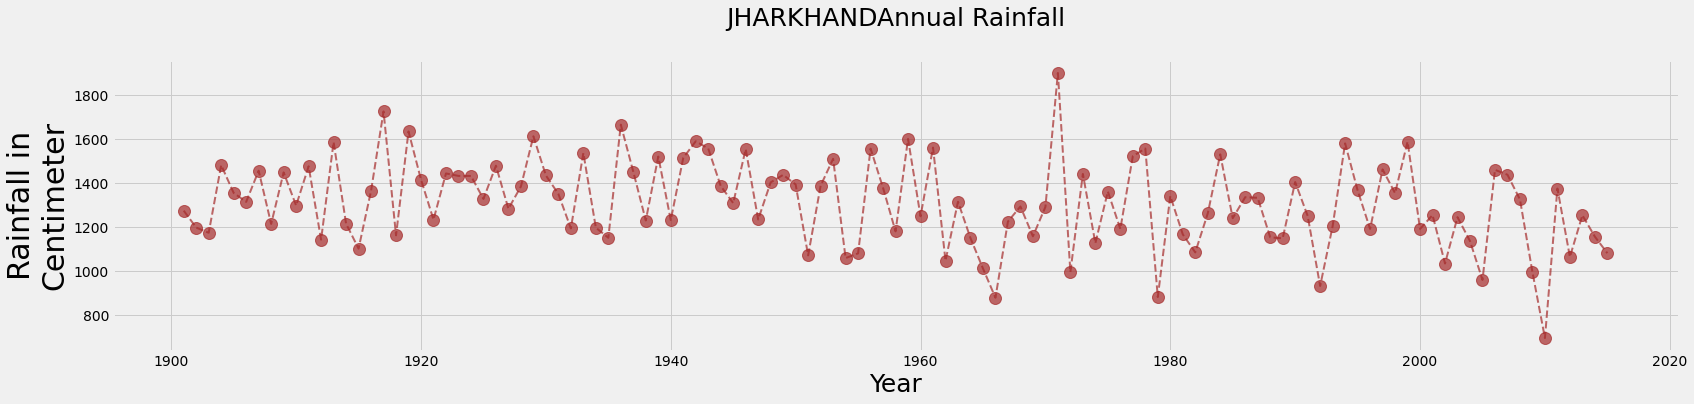

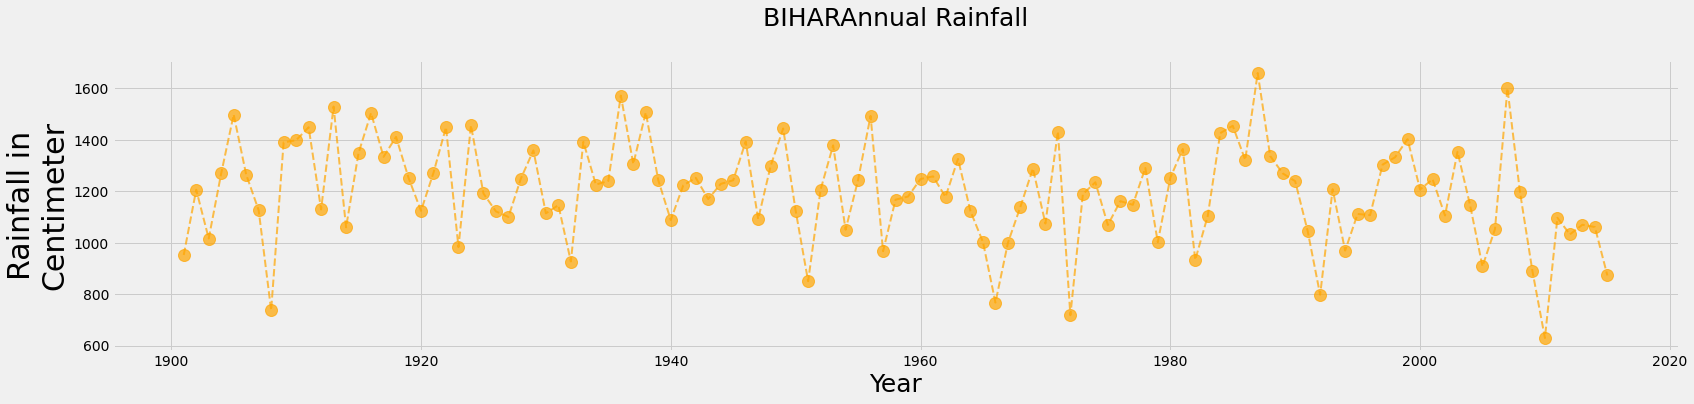

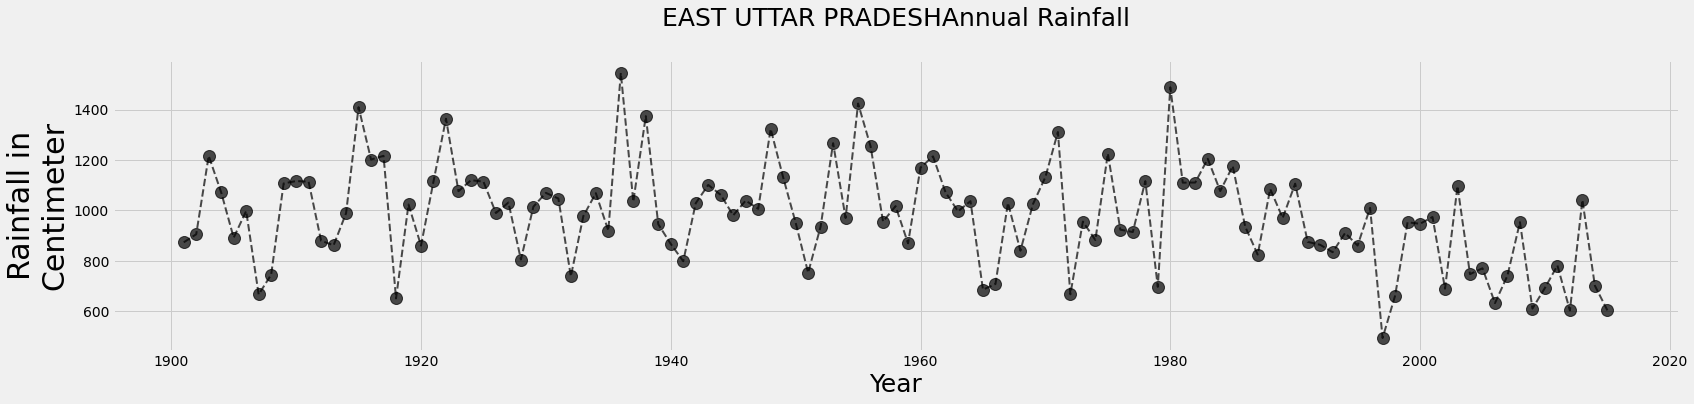

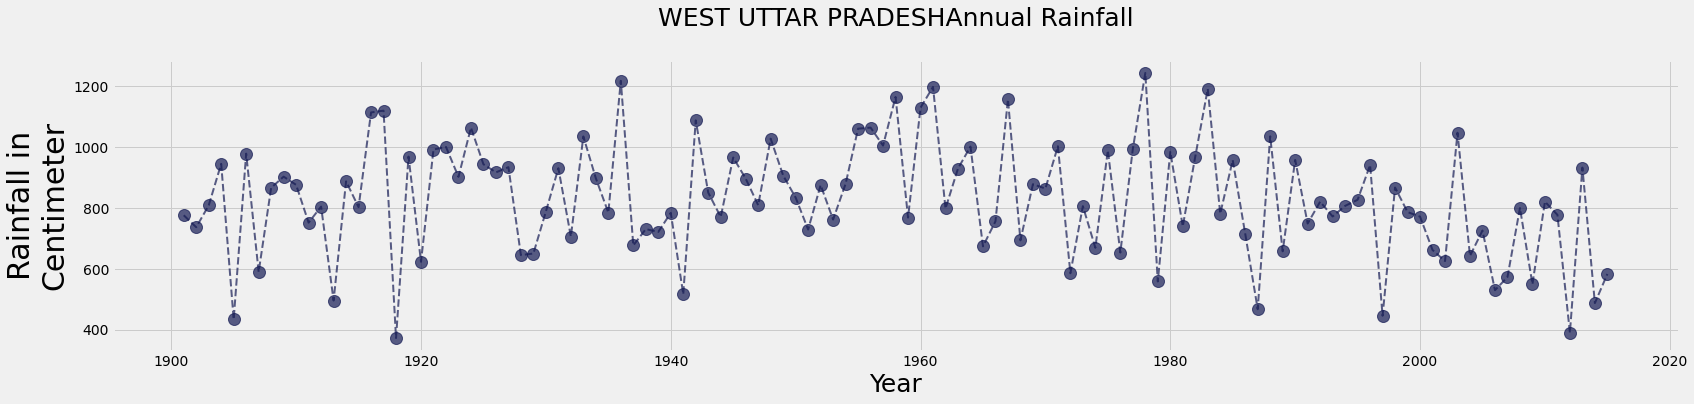

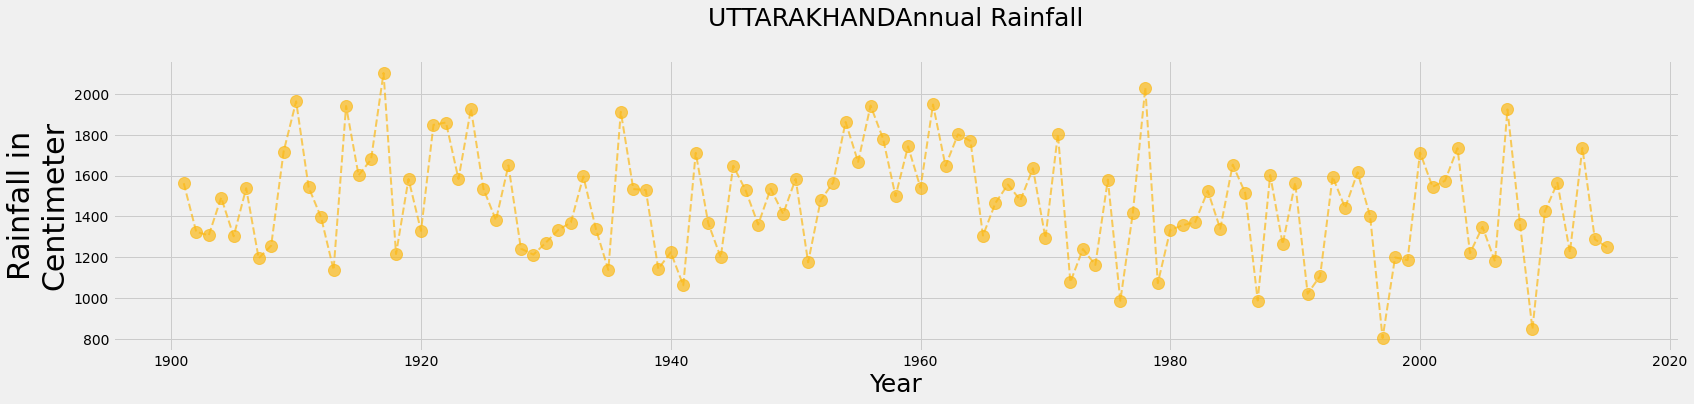

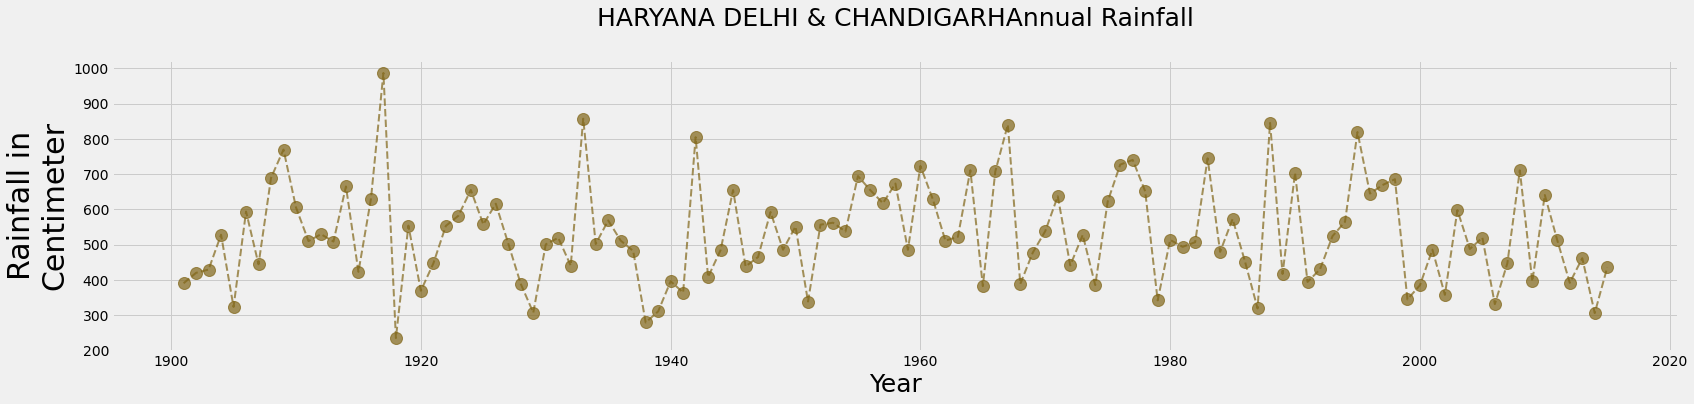

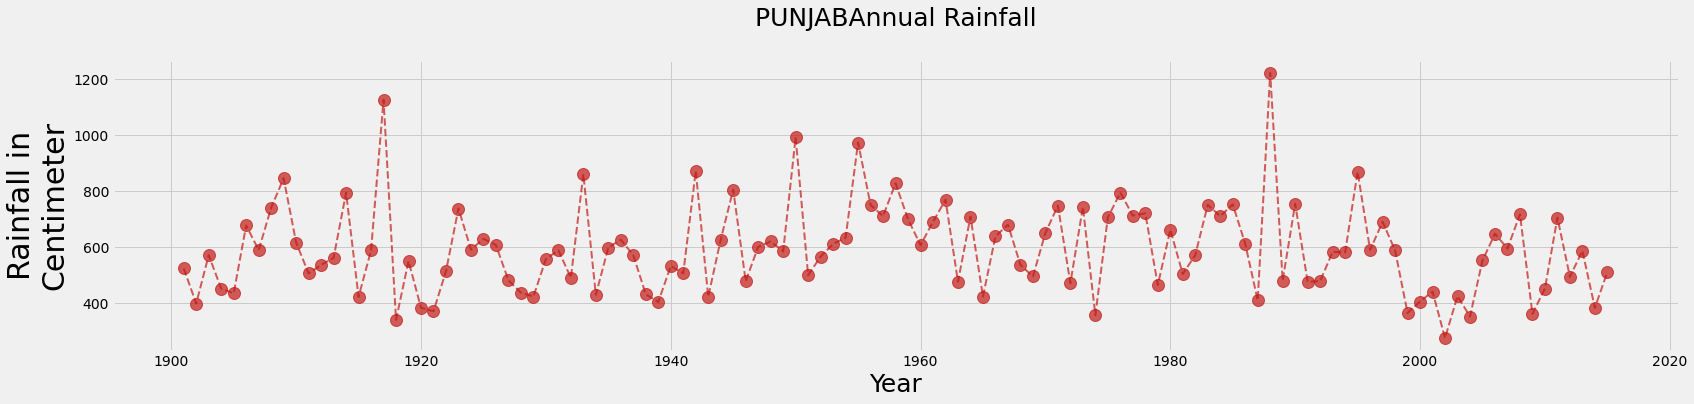

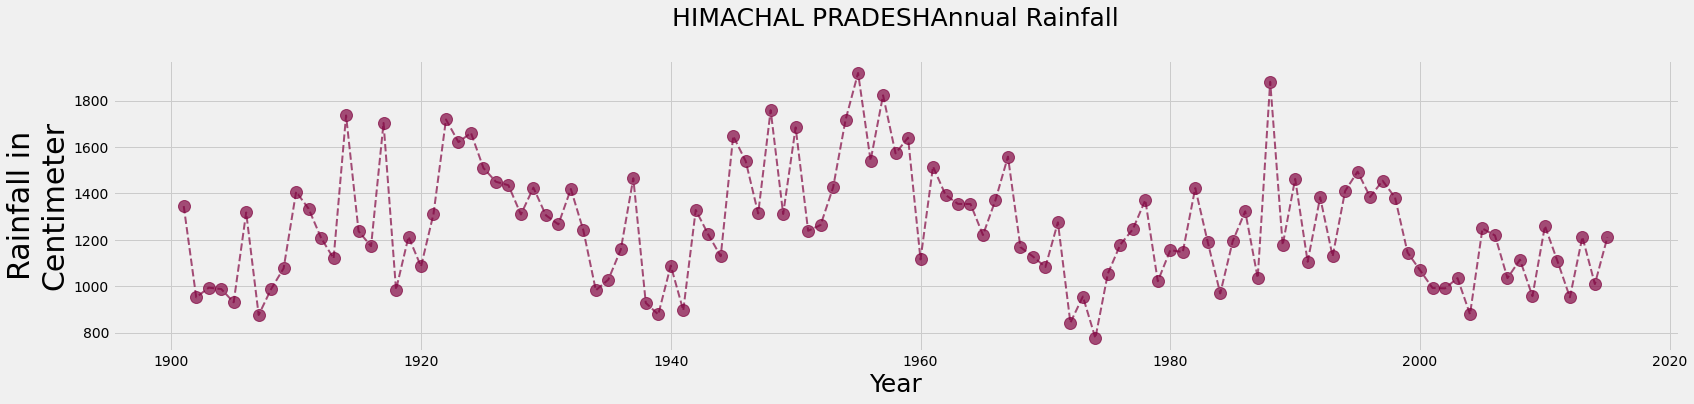

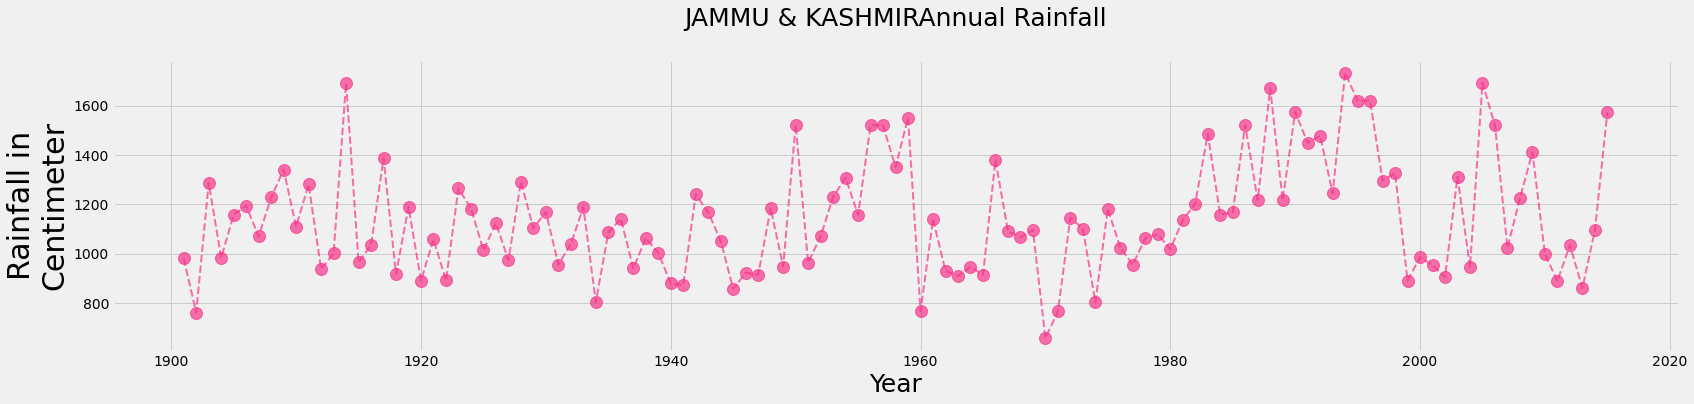

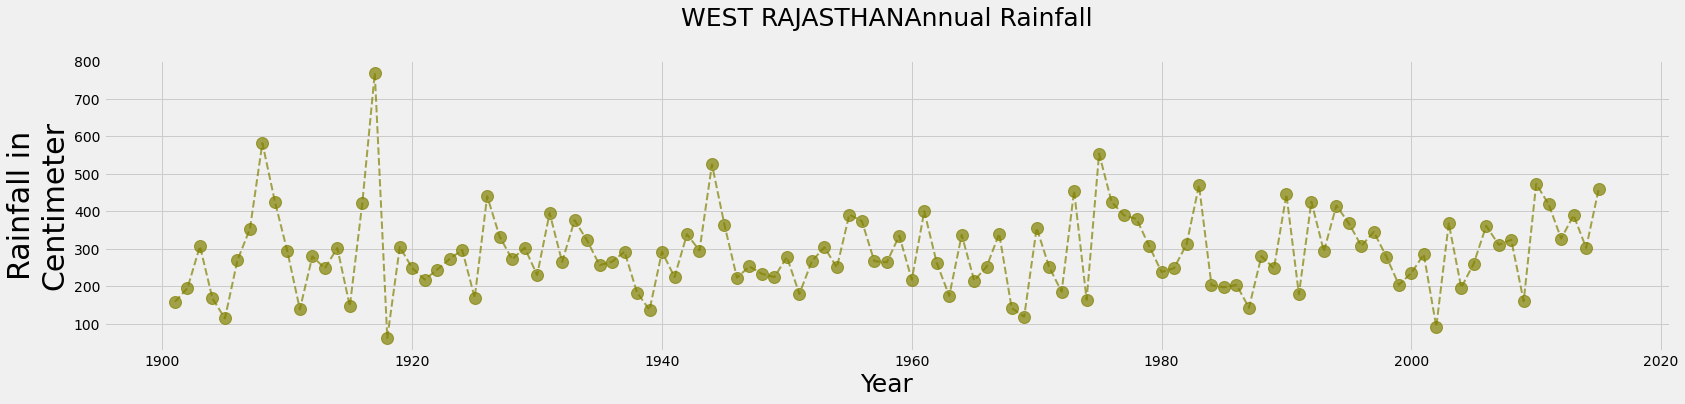

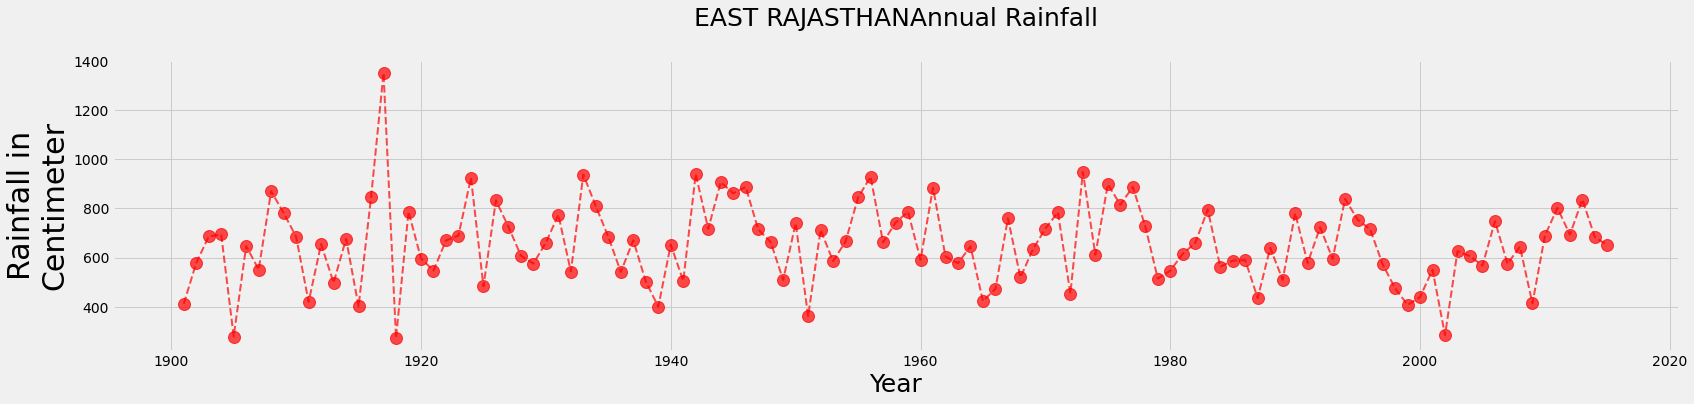

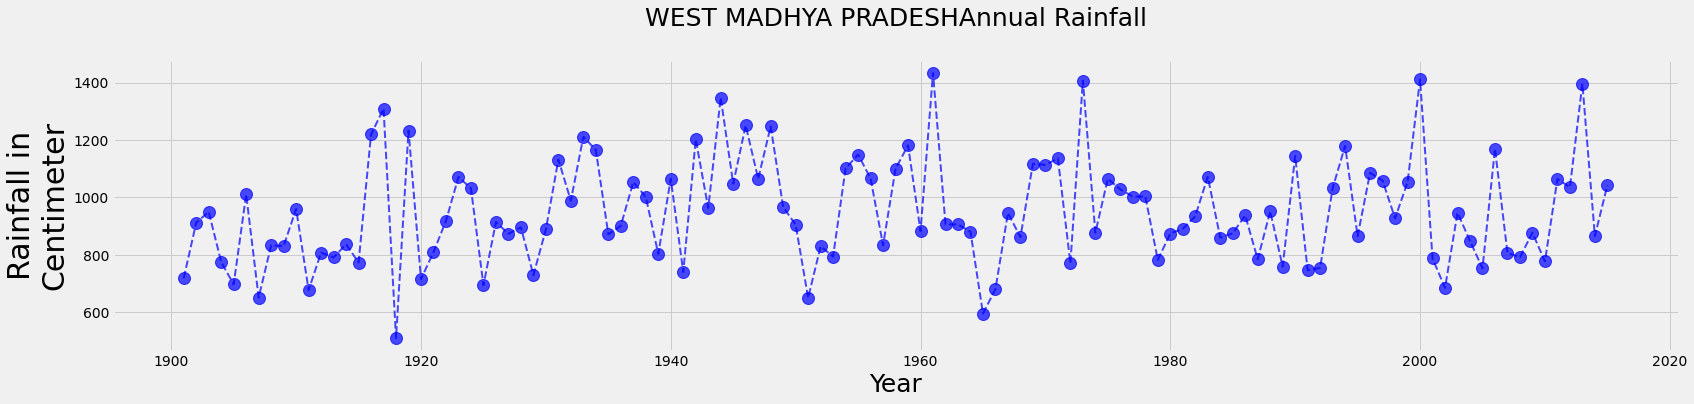

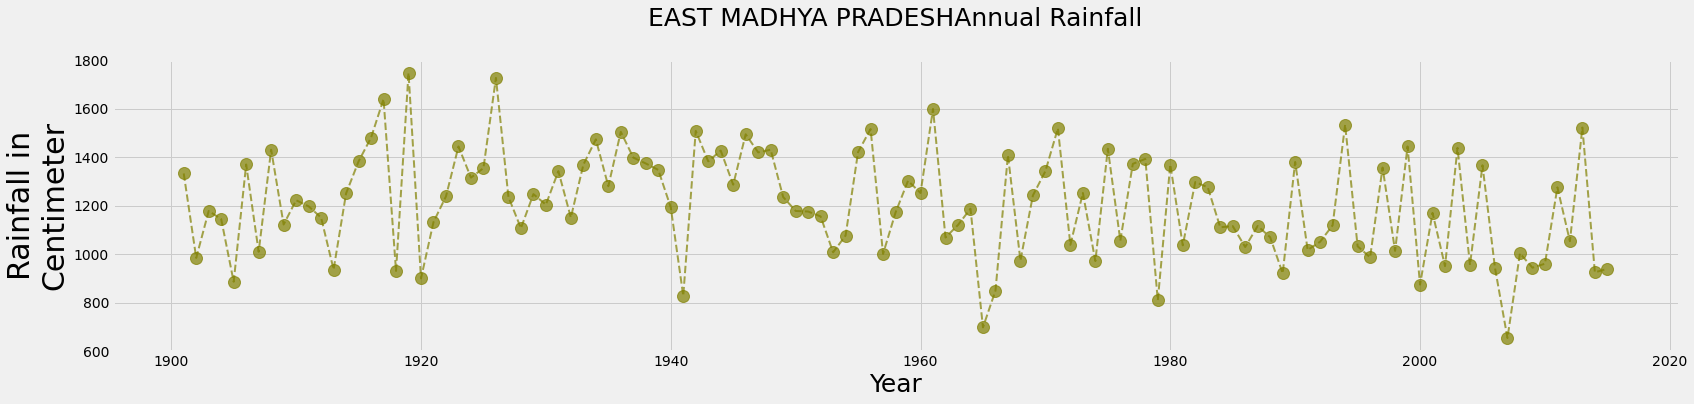

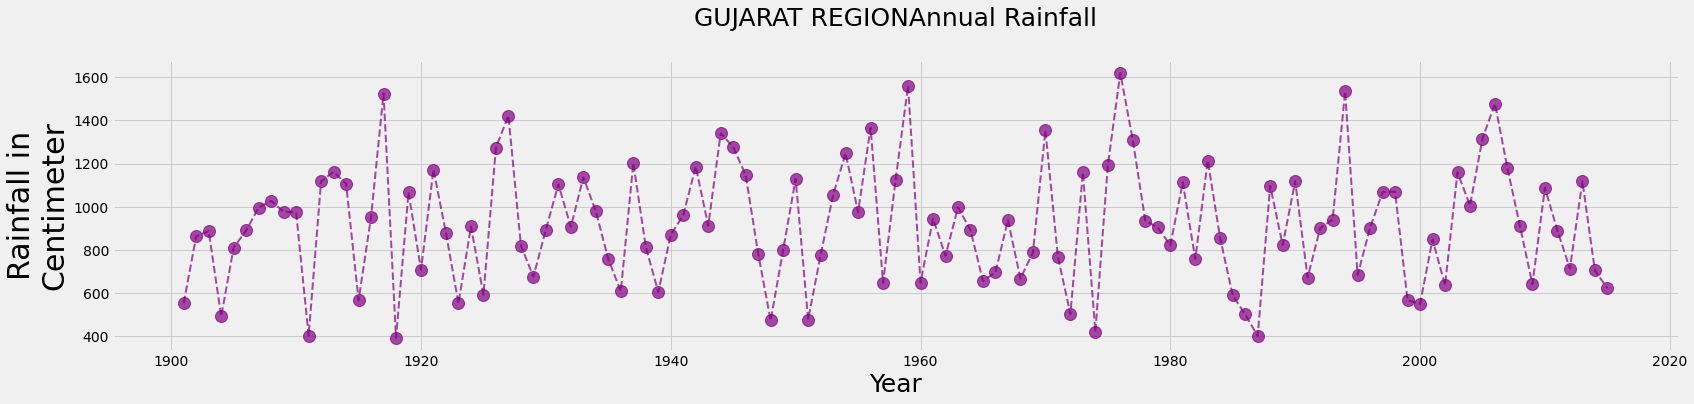

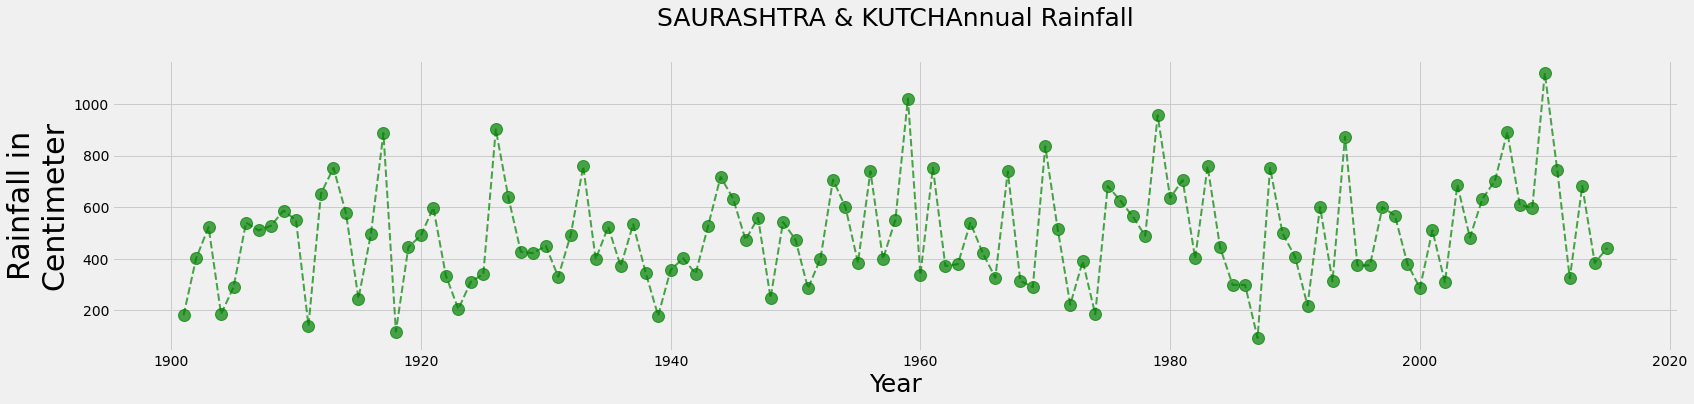

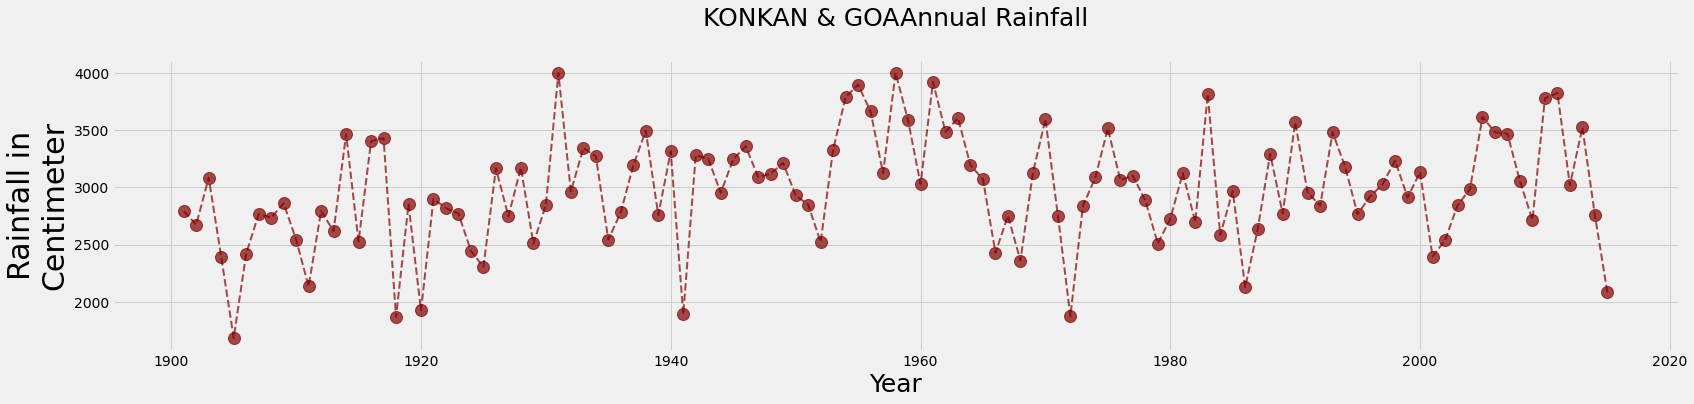

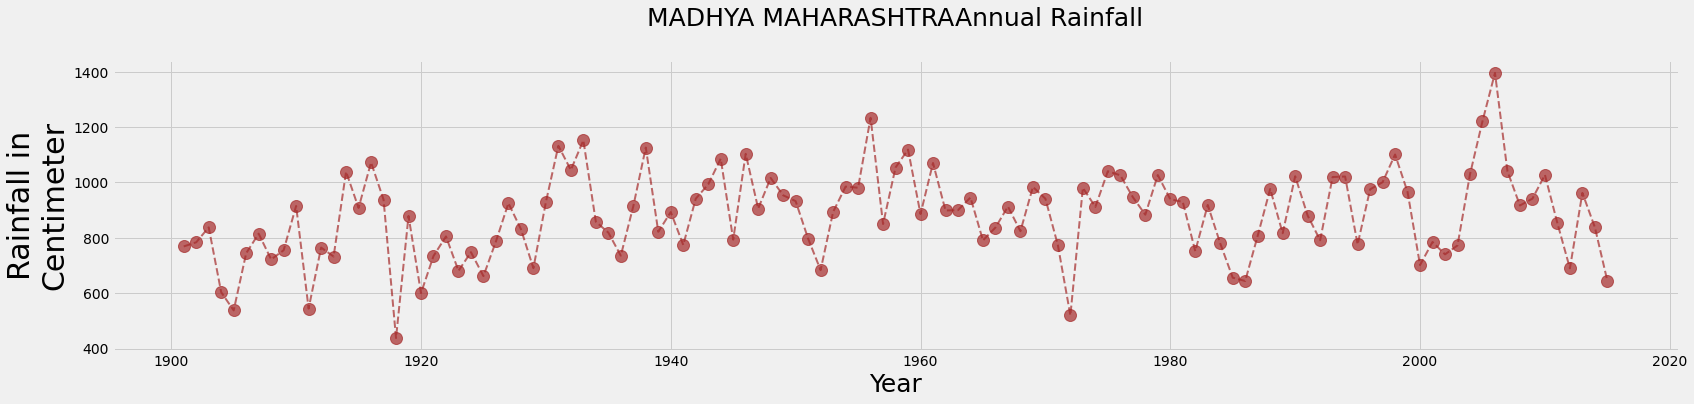

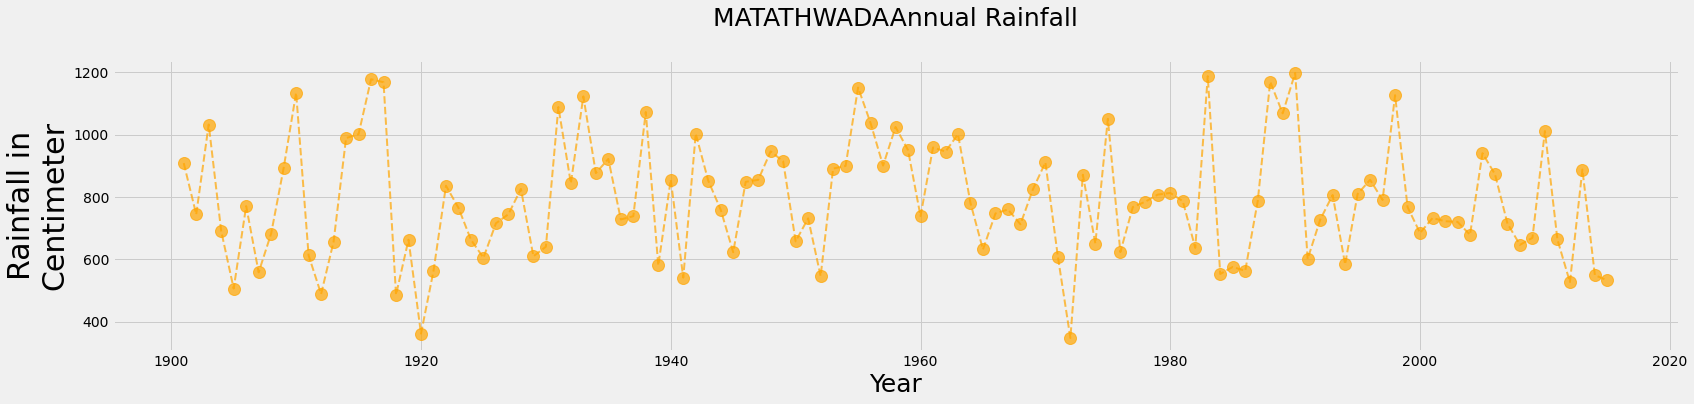

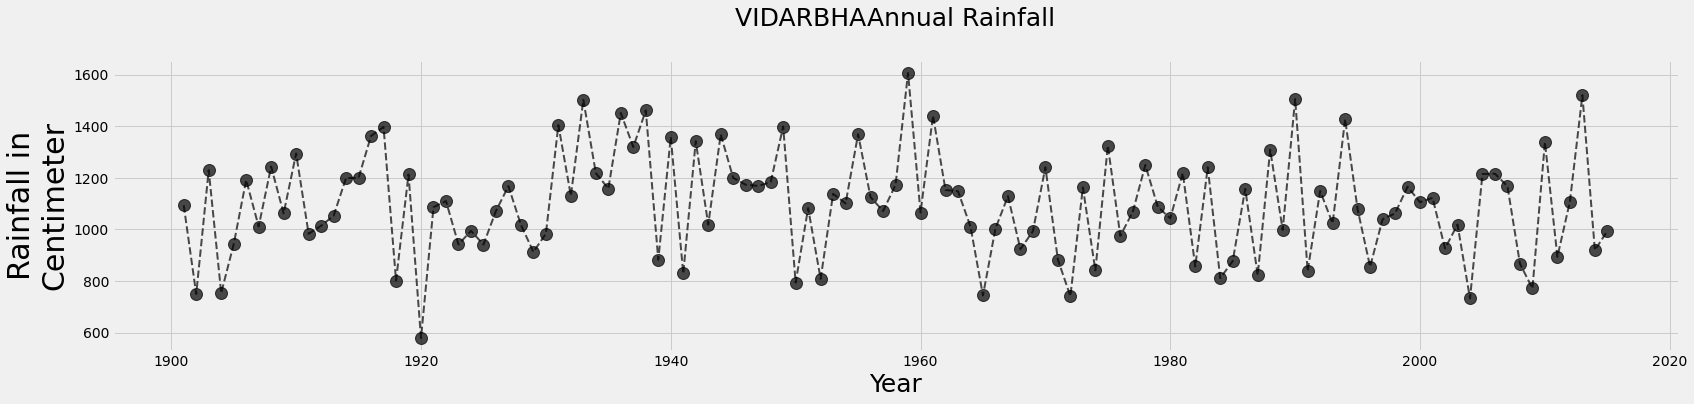

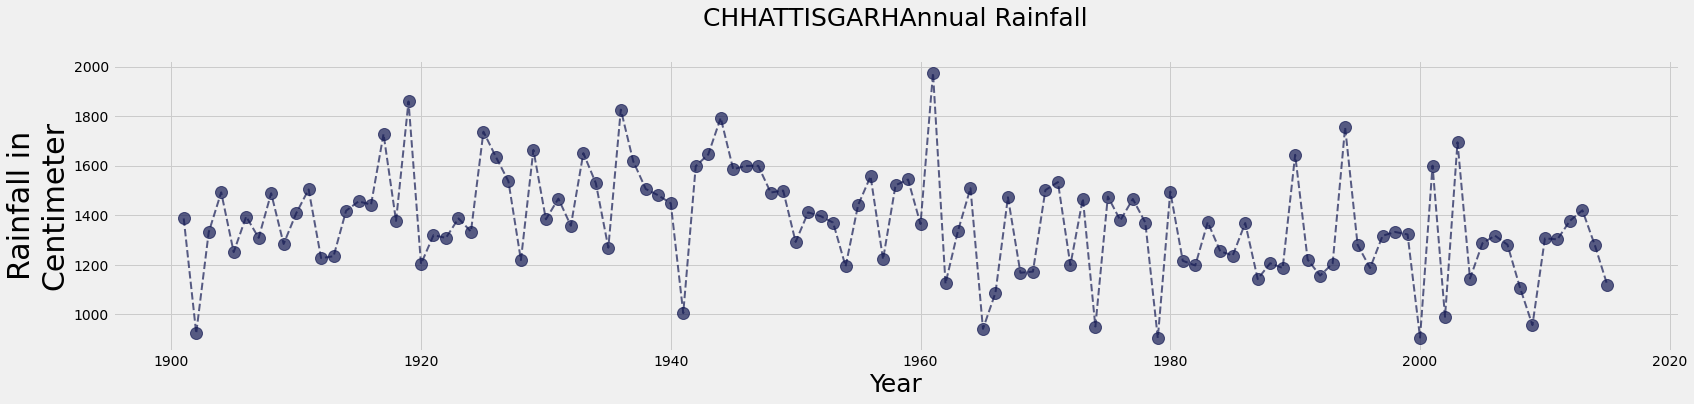

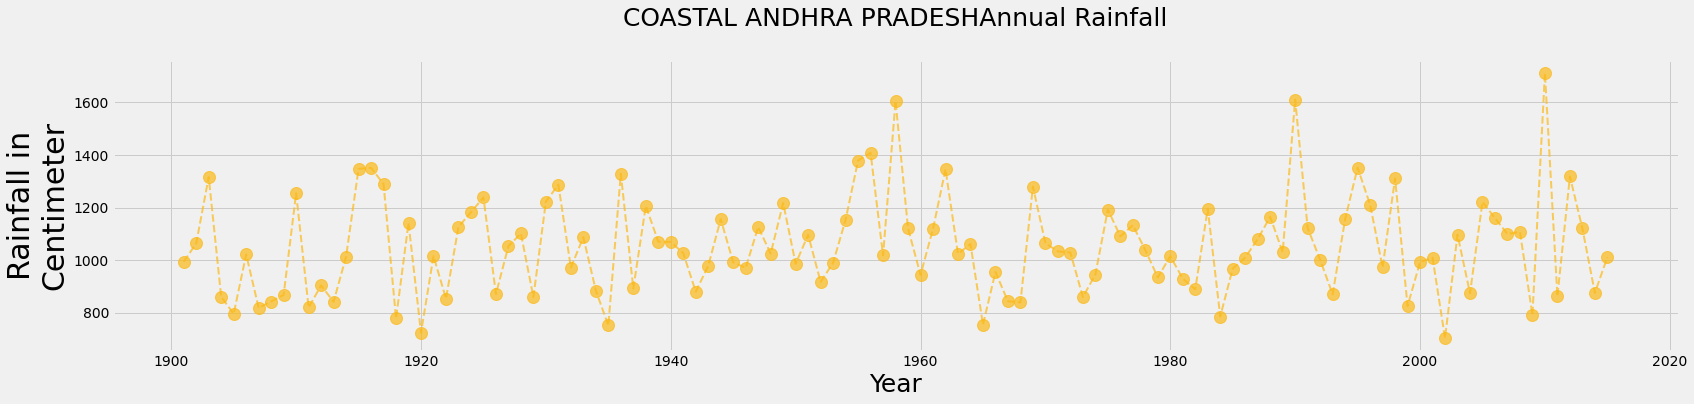

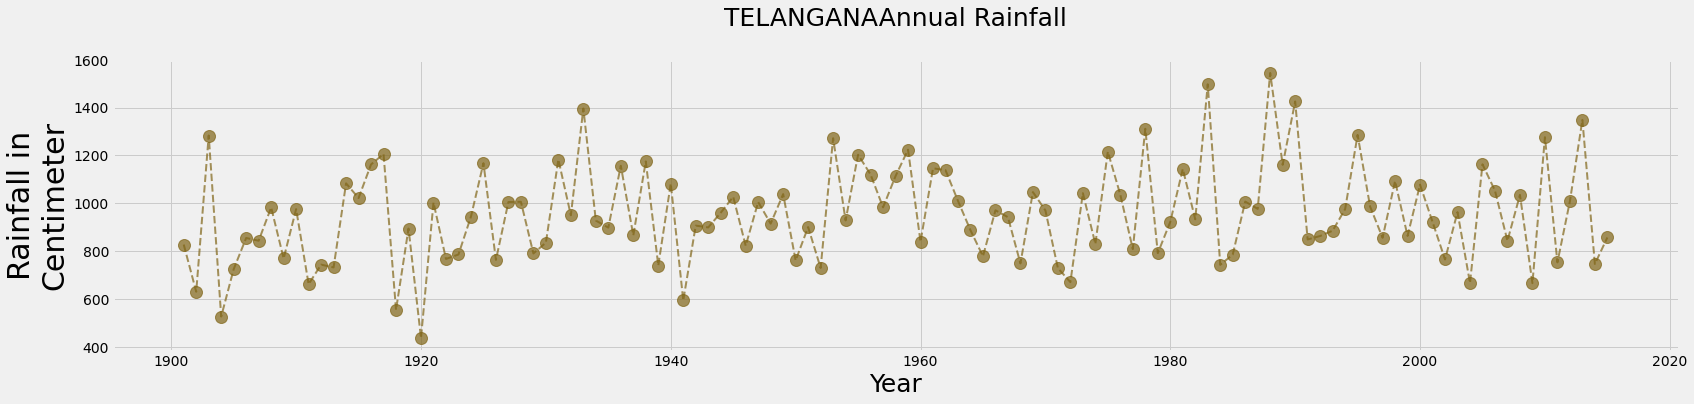

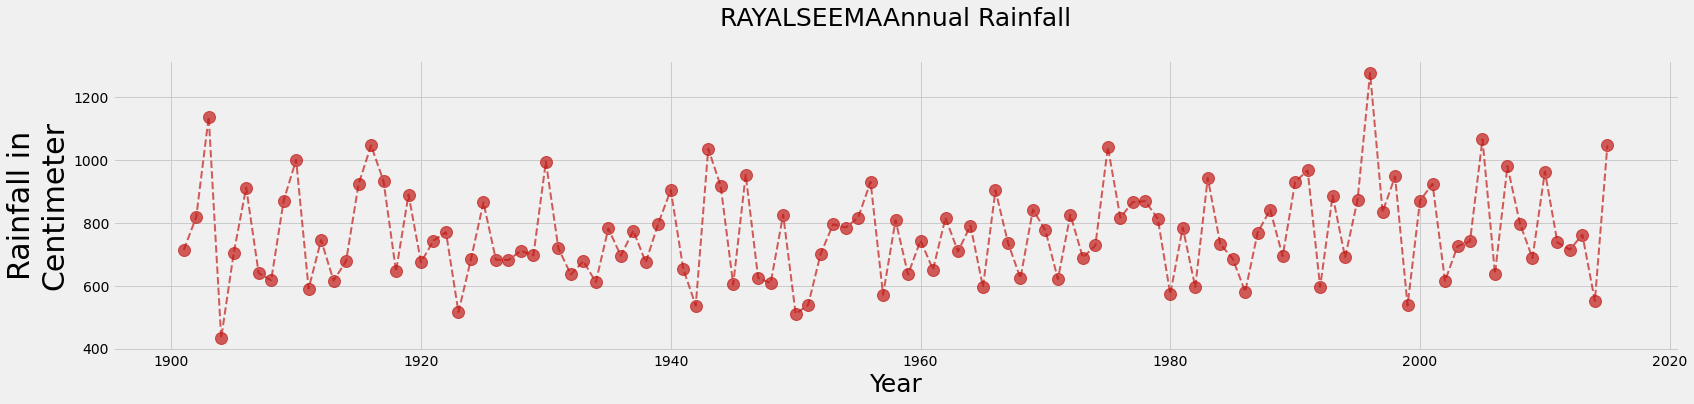

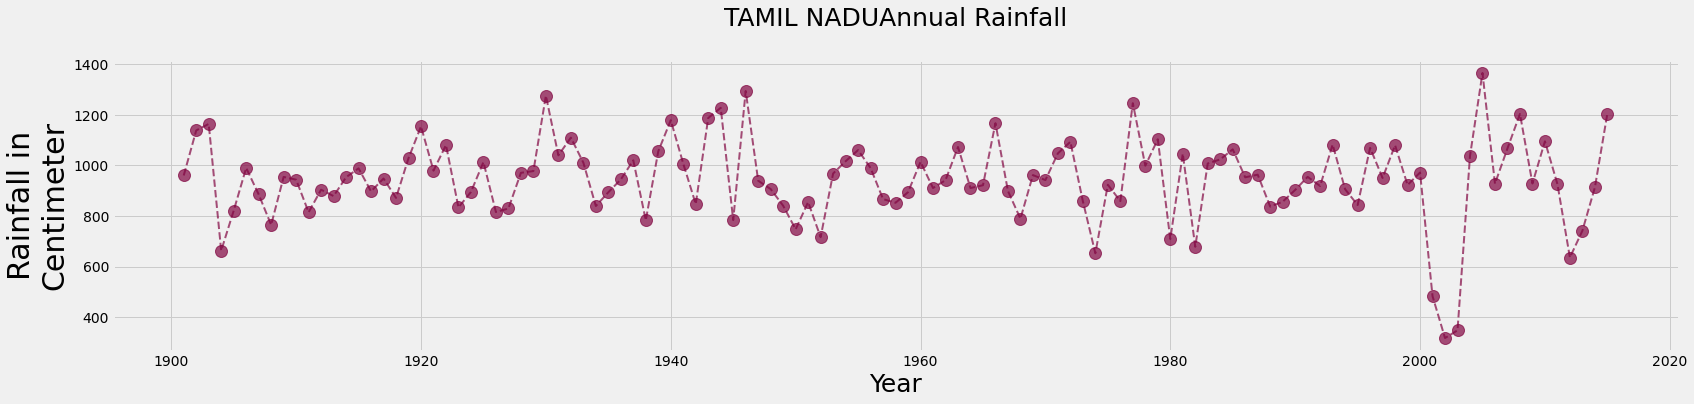

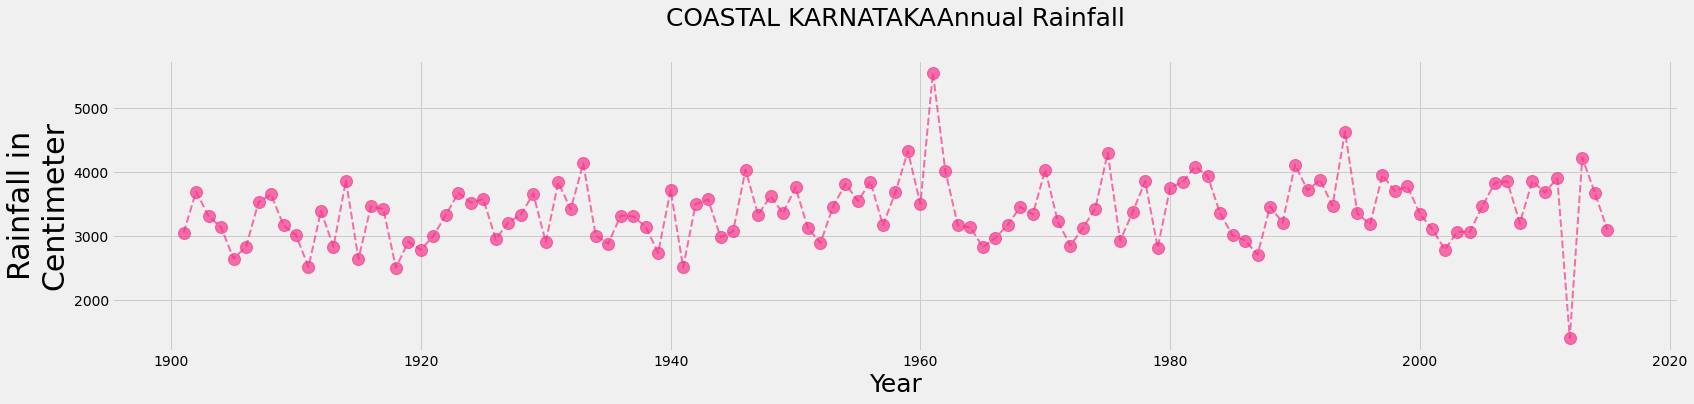

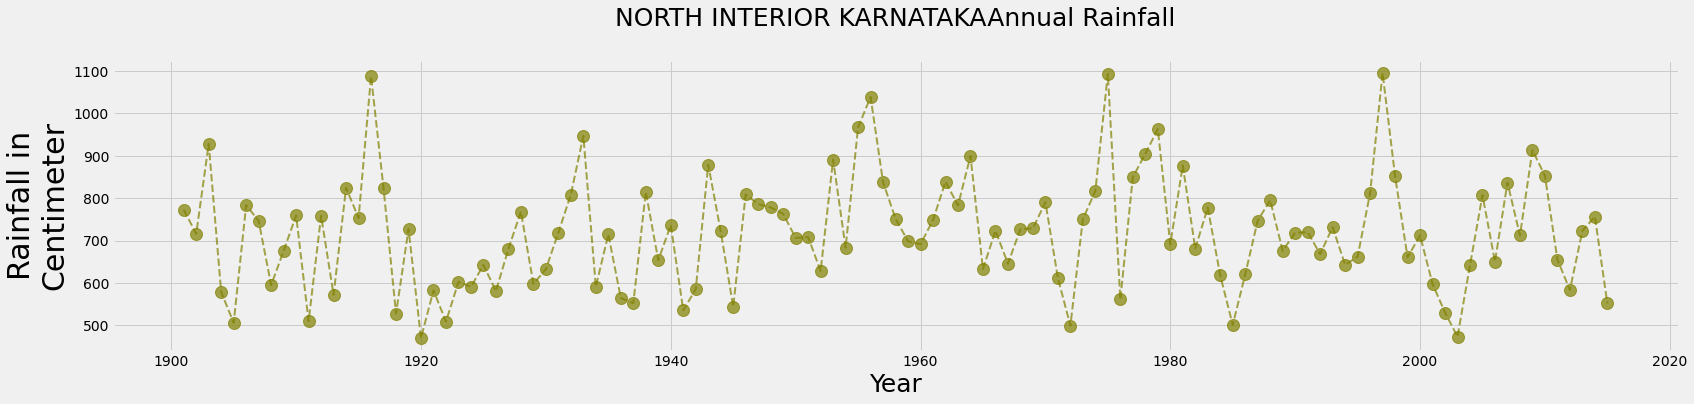

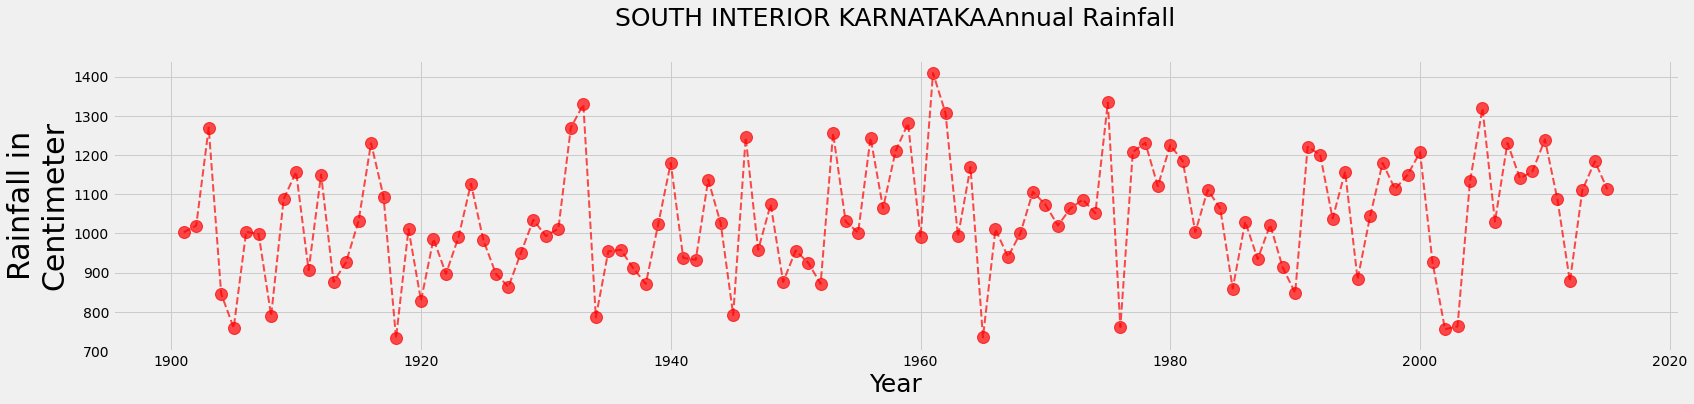

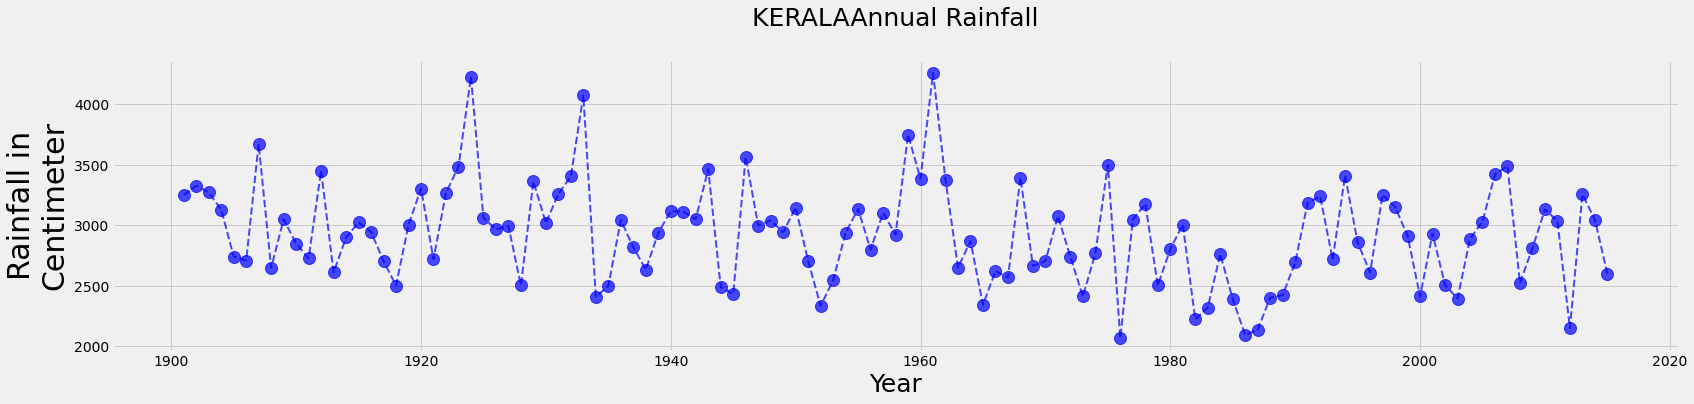

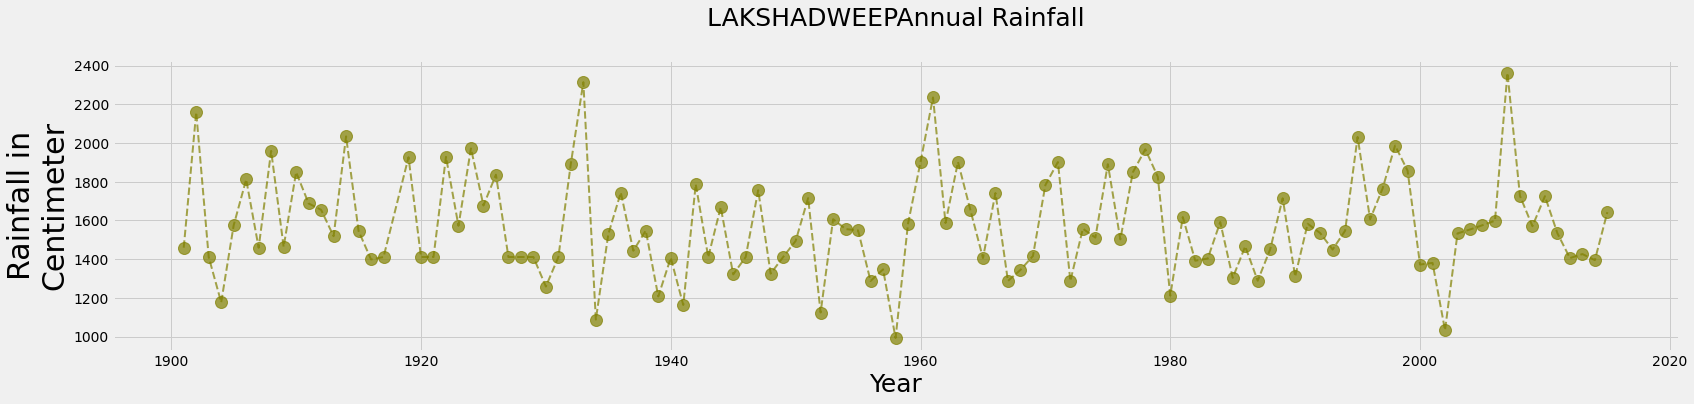

In [5]:
def subdivision(column,division):
    year = []
    annual = []
    for i in range(len(column)):
        if column[i] == division:
            if 'nan' != str(data['ANNUAL'][i]) and 'NAN' != str(data['ANNUAL'][i]):
                year.append(data['YEAR'][i])
                annual.append(data['ANNUAL'][i])
    return year,annual
colors = ["#808000","#FF0000","#0000FF","#808000","#800080","#008000","#800000","#A52A2A","#FFA500","#000000","#151B54","#FBB917","#806517","#C11B17",
          "#810541","#F6358A","#808000","#FF0000","#0000FF","#808000","#800080","#008000","#800000","#A52A2A","#FFA500","#000000","#151B54","#FBB917",
          "#806517","#C11B17","#810541","#F6358A","#808000","#FF0000","#0000FF","#808000"]
country = data['SUBDIVISION'].unique()
for i in range(len(country)):
    year,annual = subdivision(data['SUBDIVISION'],str(country[i]))
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (25,5)
    plt.plot(year,annual,color=colors[i], alpha=0.7,marker='o', linestyle='dashed', linewidth=2, markersize=12)
    plt.title(str(country[i])+'Annual Rainfall\n', size=25)
    plt.xlabel('Year', size=25)
    plt.ylabel('Rainfall in\nCentimeter', size=30)
    plt.show()

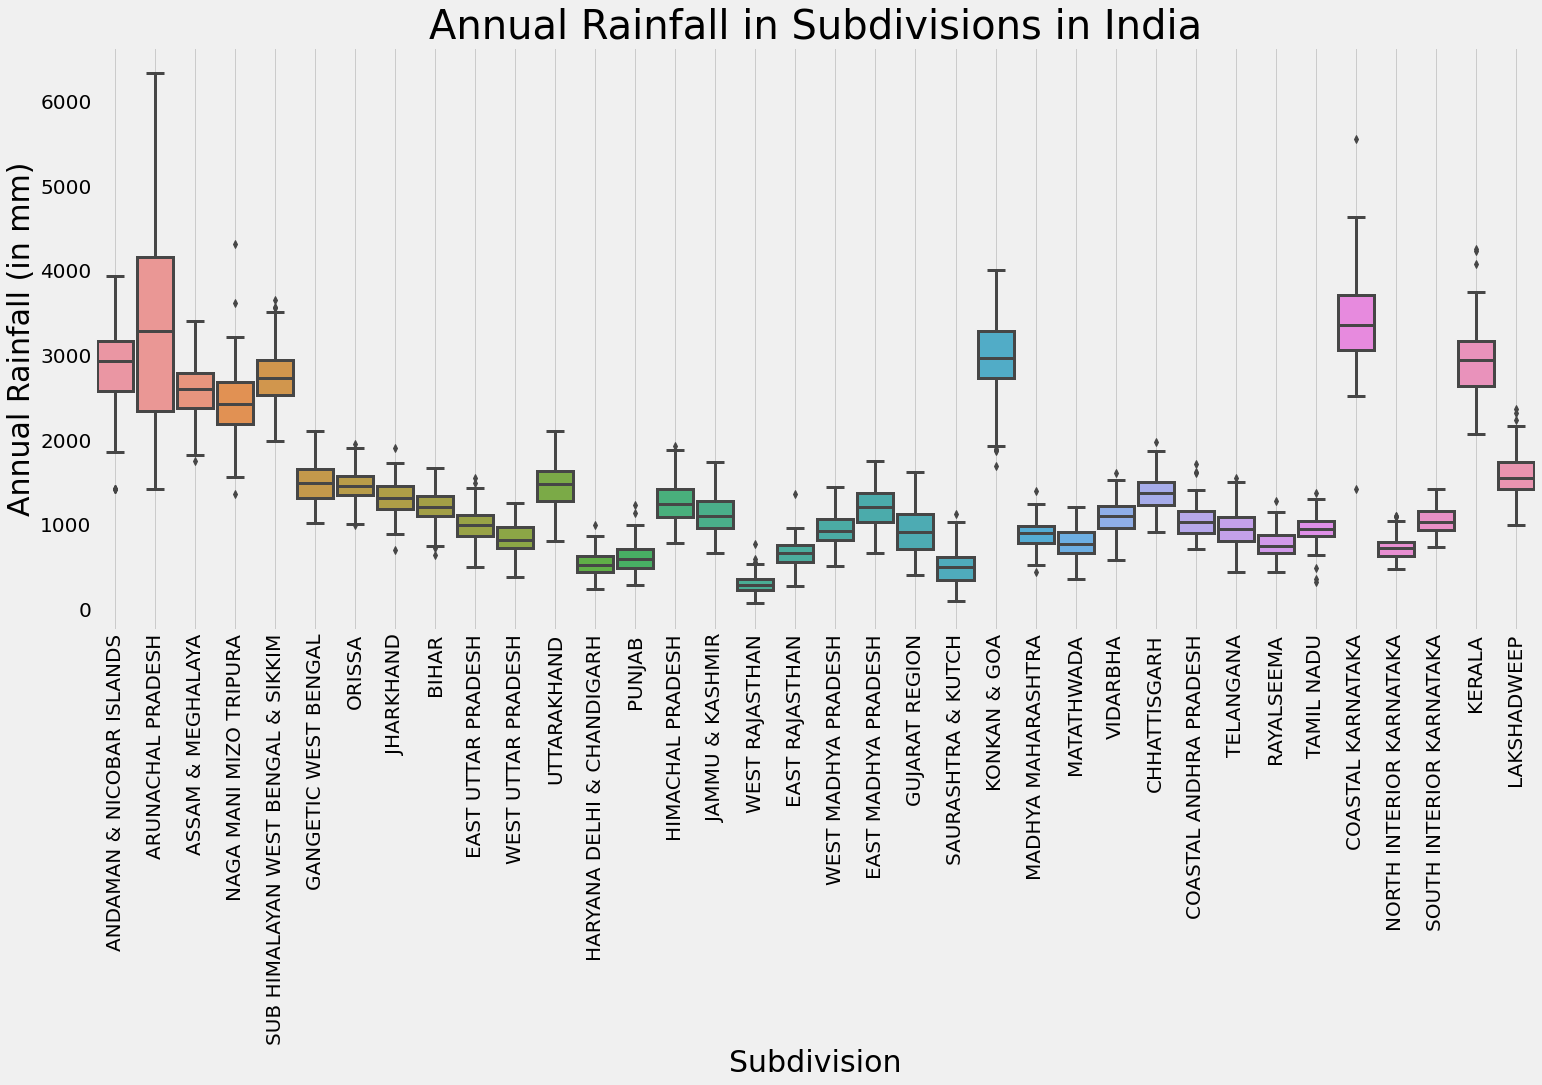

In [6]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=data, width=0.9, linewidth=3)
ax.set_xlabel('Subdivision', fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)', fontsize=30)
plt.title('Annual Rainfall in Subdivisions in India', fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)
plt.grid()
plt.ioff()

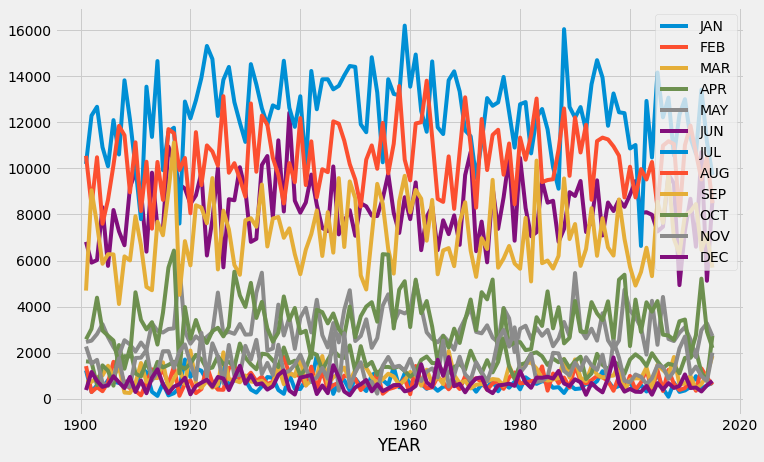

In [7]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(11,7));

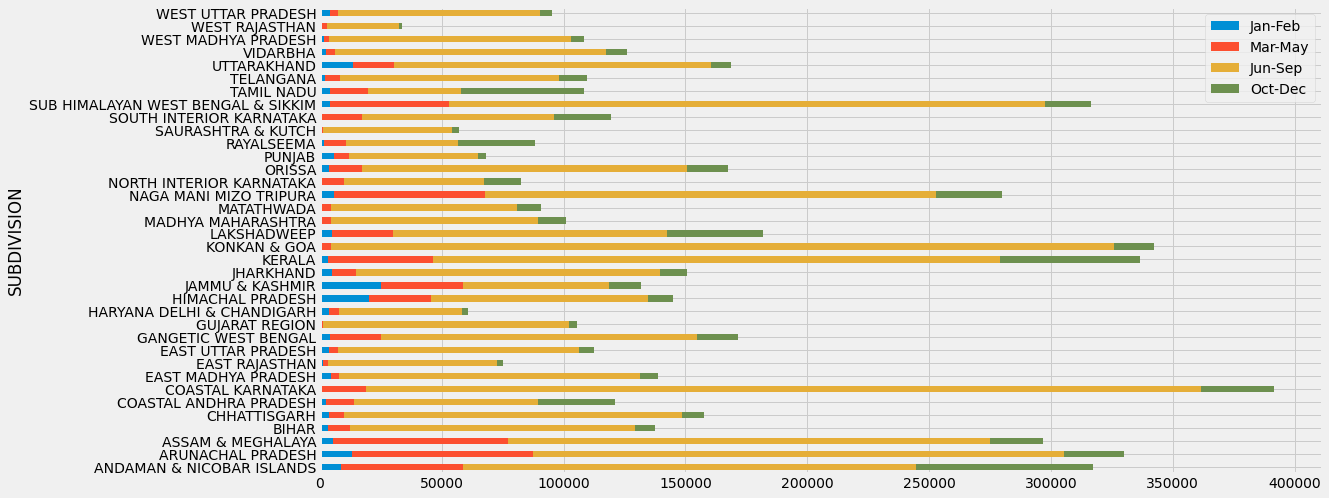

In [11]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));
#semicolon is put to remove '<matplotlib.axes._subplots.AxesSubplot at 0x7f9991593d50>'

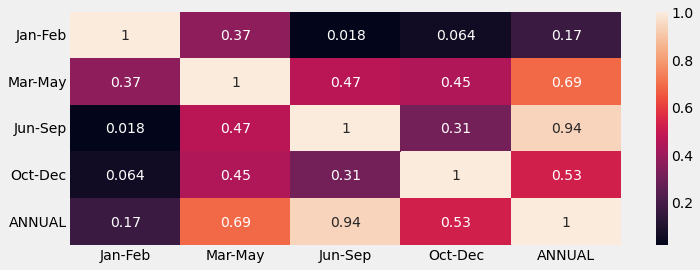

In [13]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month. For all the experiments we used 80:20 training and test ratio.

Testing metrics: We used Mean absolute error to train the models. We also shown the amount of rainfall actually and predicted with the histogram plots. We did two types of trainings once training on complete dataset and other with training with only  data All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                                 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X=division_data[:, i:i+3]
        y=division_data[:, i+3]
    else:
        X=np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [17]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)

In [18]:
#2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [20]:
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

Linear Model

Linear model is used in different ways according to the context. The most common occurrence is in connection with regression models and the term is often taken as synonymous with linear regression model. However, the term is also used in time series analysis with a different meaning. In each case, the designation "linear" is used to identify a subclass of models for which substantial reduction in the complexity of the related statistical theory is possible.

In [22]:
from sklearn import linear_model
reg=linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

96.32435229744083


In [27]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015  
y_year_pred_2015 = reg.predict(X_year_2015)
print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


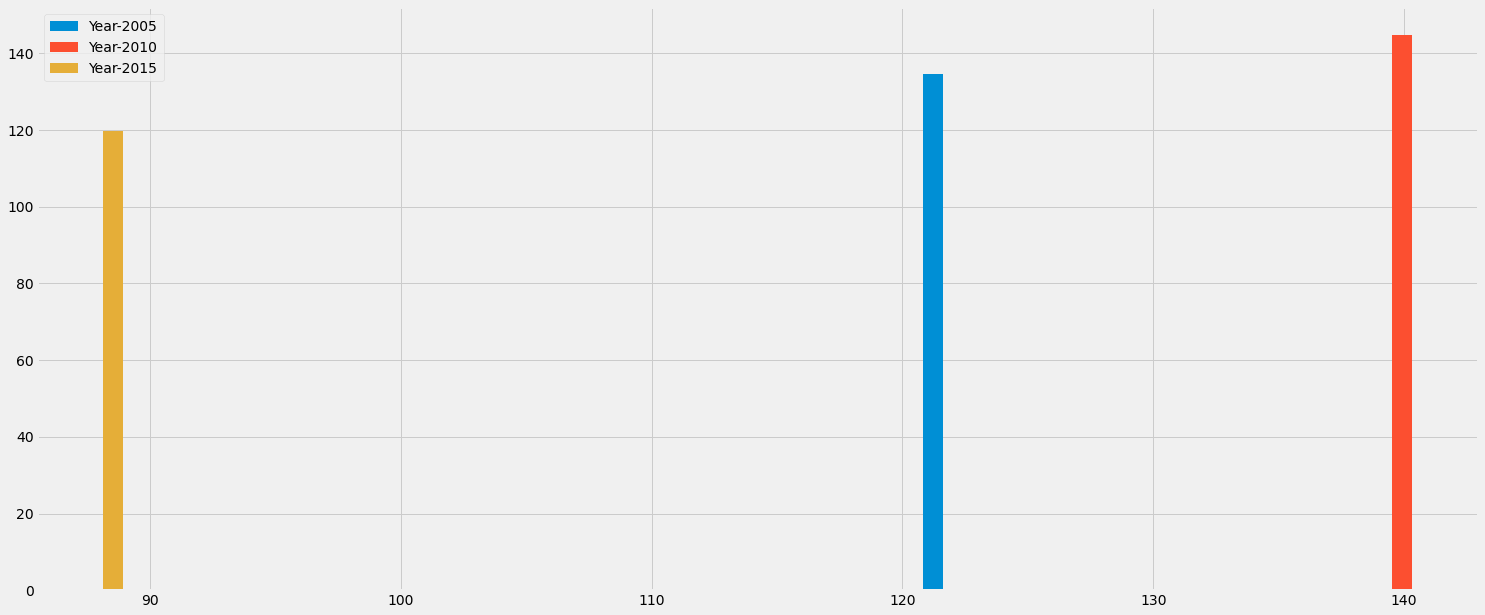

In [28]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification and regression challenges. We plot each data item as a point in n-dimensional space (where n is number of features) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. A Support Vector Machine models the situation by creating a feature space, which is a finite-dimensional vector space, each dimension of which represents a "feature" of a particular object. The goal of the SVM is to train a model that assigns new unseen objects into a particular category. It achieves this by creating a linear partition of the feature space into two categories. Based on the features in the new unseen objects, it places an object "above" or "below" the separation plane, leading to a categorization. It is non-probabilistic, because the features in the new objects fully determine its location in feature space and there is no stochastic element involved. A subset of training data lies on Biased and Unbiased Hyper planes

In [29]:
from sklearn.svm import SVR
clf=SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

126.13685895963154


In [30]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015  
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


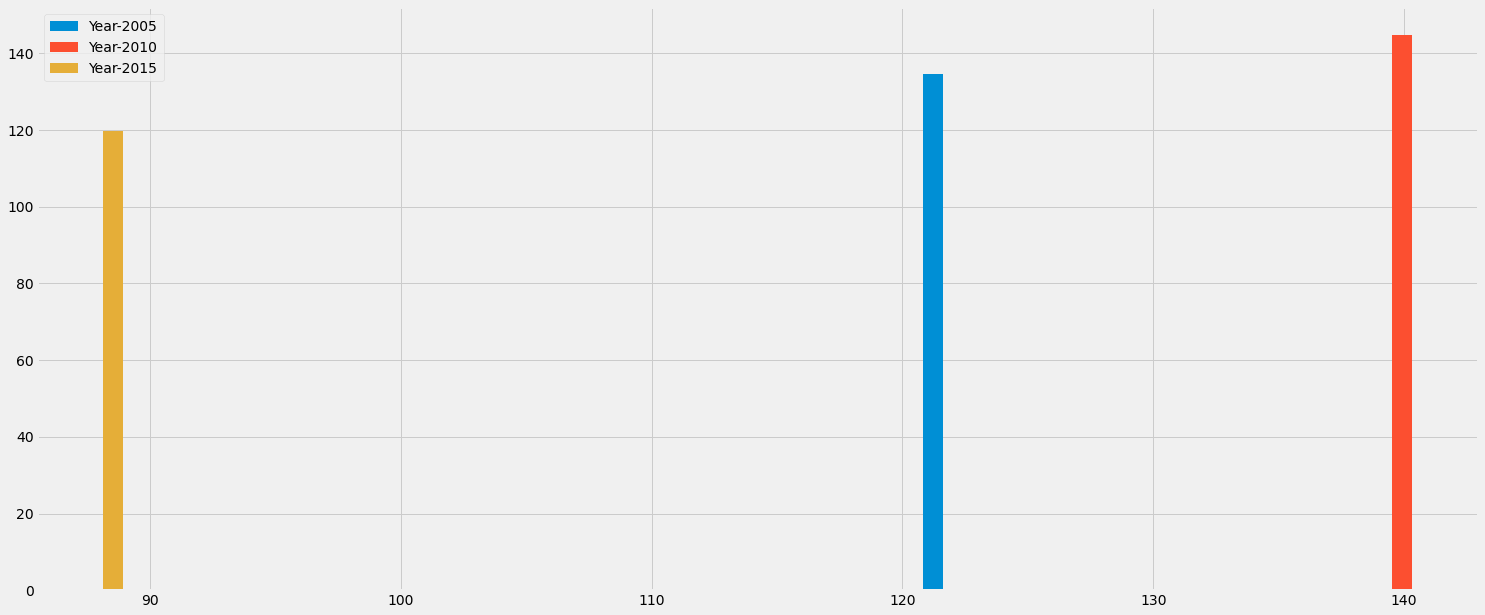

In [31]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

NEURAL NETS

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

In [32]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten
#NN model
inputs=Input(shape=(3,1))
x=Conv1D(64,2,padding='same',activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 3, 64)             192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080  

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015   
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

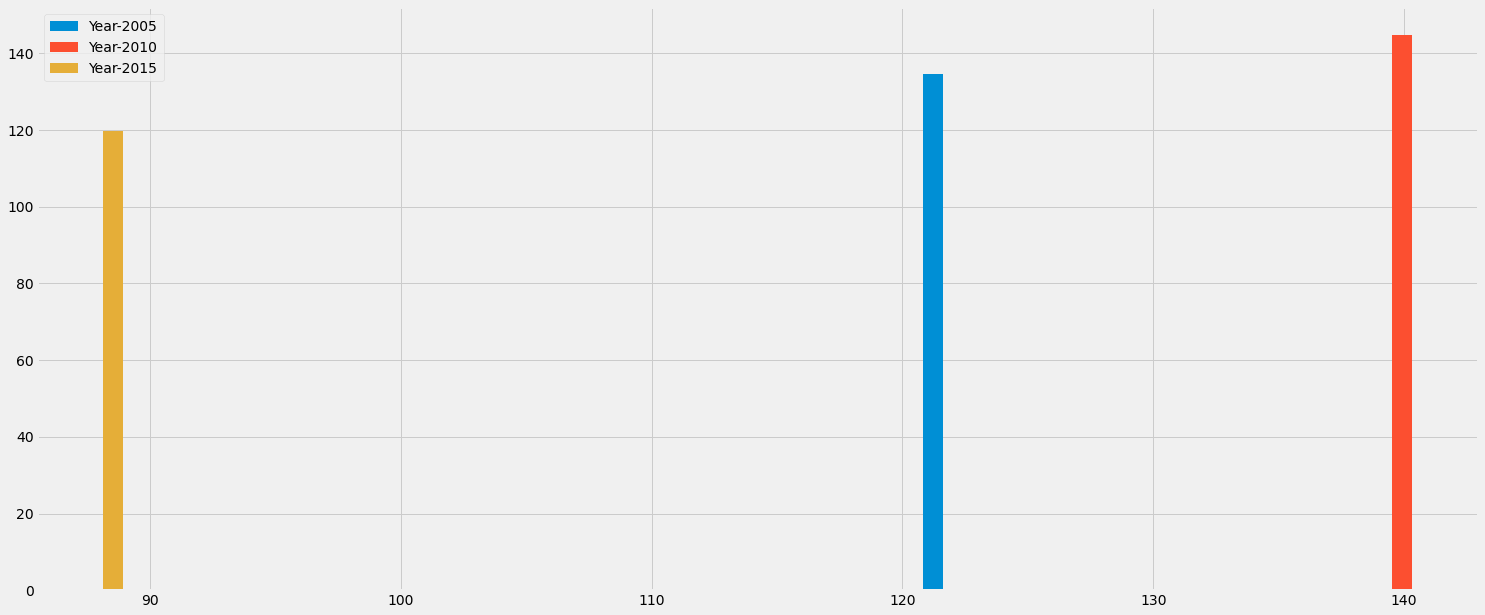

In [33]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

ORISSA

In [34]:
#spliting training and testing data only for telangana
ORISSA = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                                'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'ORISSA'])

X = None; y = None
for i in range(ORISSA.shape[1]-3):
    if X is None:
        X = ORISSA[:, i:i+3]
        y = ORISSA[:, i+3]
    else:
        X = np.concatenate((X, ORISSA[:, i:i+3]), axis=0)
        y = np.concatenate((y, ORISSA[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [35]:
#linear model for orissa
from sklearn import linear_model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

97.20977519096155


In [37]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

MEAN 2005
121.2111111111111 144.70633375629512
Standard deviation 2005
123.77066107608005 94.66810513773909
MEAN 2010
139.93333333333334 151.6954213387311
Standard deviation 2010
135.71320250194282 102.1042444810361
MEAN 2015
88.52222222222223 133.8438025237024
Standard deviation 2015
86.62446123324875 65.32200645833244


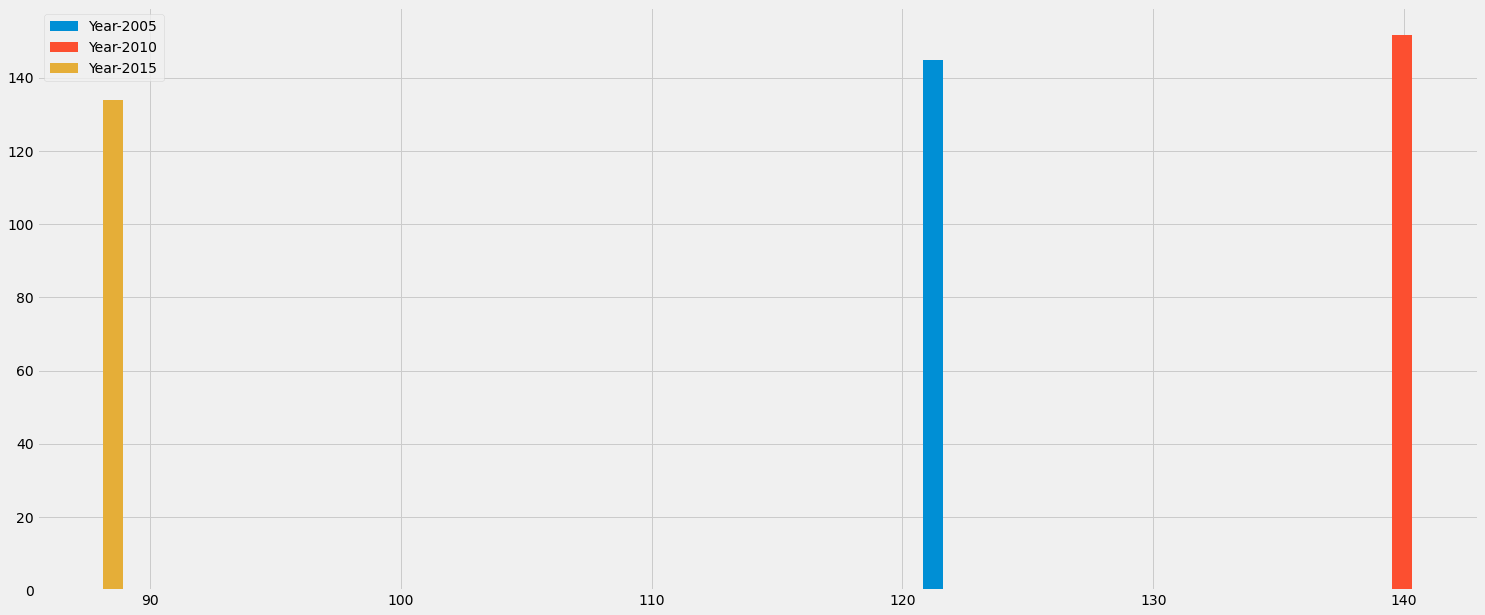

In [38]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

In [39]:
#svm model for orissa
from sklearn.svm import SVR
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

126.24039125101837


In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

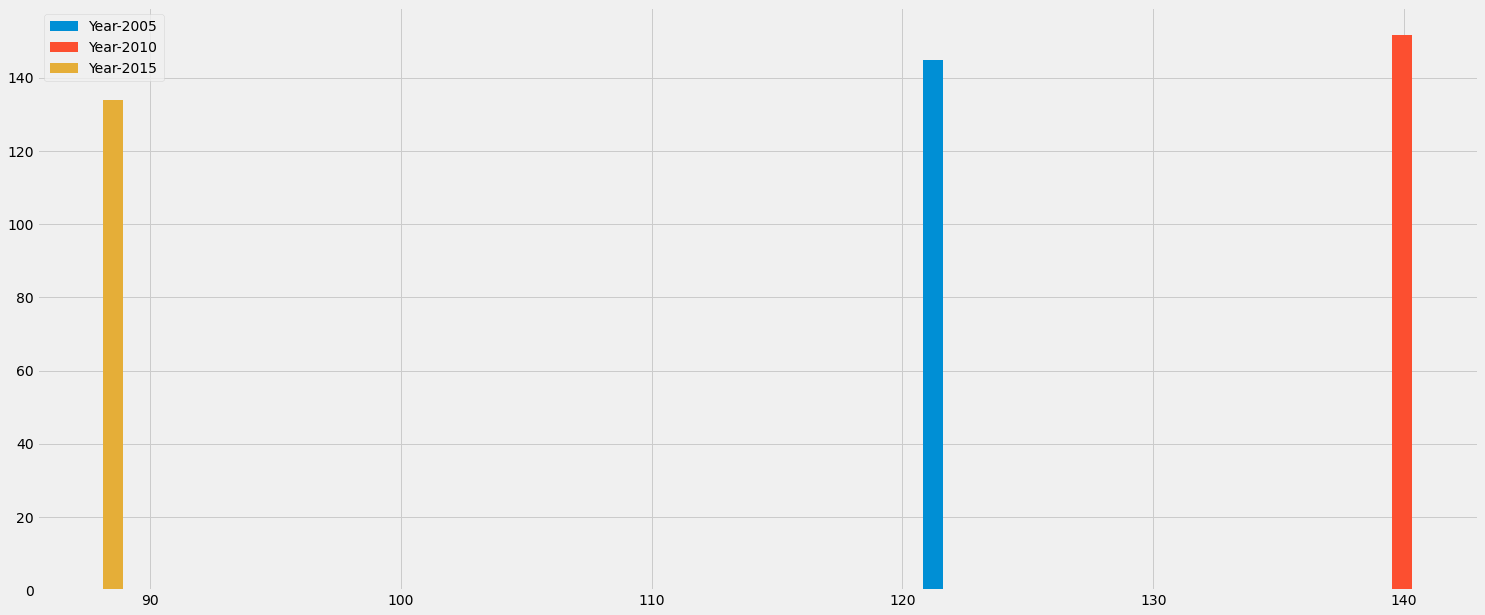

In [40]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

In [41]:
#ann model for orissa
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
15/15 [==============================] - 0s 8ms/step - loss: 8082.6118 - mae: 67.9717 - val_loss: 8907.5664 - val_mae: 73.3356
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 7687.4277 - mae: 65.3499 - val_loss: 8322.7520 - val_mae: 69.9864
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 7467.7666 - mae: 63.6208 - val_loss: 8181.0669 - val_mae: 68.4022
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 7261.1553 - mae: 63.2891 - val_loss: 8085.1299 - val_mae: 68.6080
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 7098.1953 - mae: 62.9554 - val_loss: 7866.1826 - val_mae: 67.3889
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 6939.5610 - mae: 62.0608 - val_loss: 7825.1055 - val_mae: 66.3710
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 6830.8271 - mae: 61.4559 - val_loss: 7689.3496 - val_mae: 65.2946
Epoch 8/10
15/15 [================

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))

#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

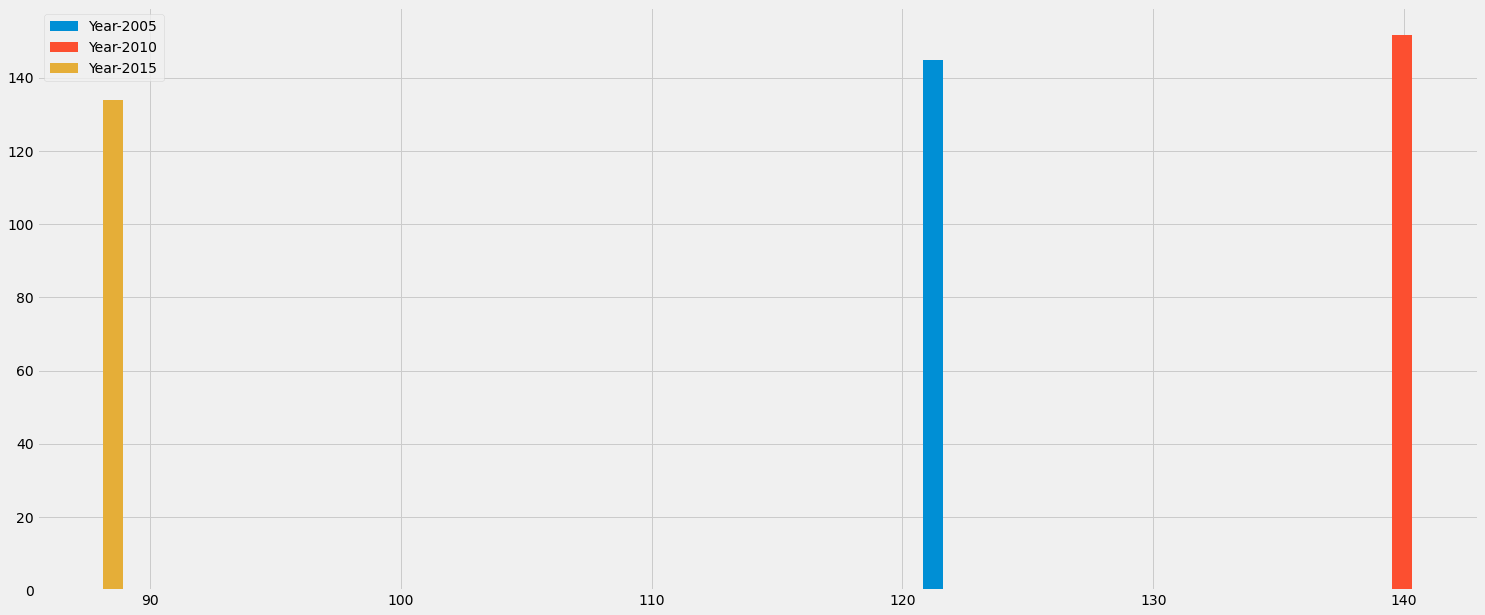

In [42]:
plt.rcParams['figure.figsize']=(23,10)
plt.bar([np.mean(y_year_2005)],[np.mean(y_year_pred_2005)],label = "Year-2005")
plt.bar([np.mean(y_year_2010)],[np.mean(y_year_pred_2010)],label = "Year-2010")
plt.bar([np.mean(y_year_2015)],[np.mean(y_year_pred_2015)],label = "Year-2015")
plt.legend()
plt.show()

Training on complete dataset

Algorithm MAE
1. Linear Regression - 96.94 
2. SVR - 126.136 
3. Artificial neural networks - 88.2648

Training on ORISSA dataset

Algorithm MAE
1. Linear Regression - 97.207798
2. SVR - 126.24075954294
3. Artificial neural networks -  75.2648

Neural Networks performs better than others.

Observed MAE is very high which indicates machine learning models won't work well for prediction of rainfall.

ORISSA data has a single pattern that can be learned by models, rather than learning different patterns of all states, so has high accuracy.

CONCLUSION

Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.